In [7]:
import json
import pickle
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

try:
       from prophet.plot import plot_plotly, plot_components_plotly
       from prophet import Prophet
except:
       !pip install prophet
       from prophet.plot import plot_plotly, plot_components_plotly
       from prophet import Prophet

In [4]:


pd.options.display.max_columns = None
pd.options.display.max_rows = None



### Examining open data on particulate matter can help improve our understanding of air pollution and inform strategies to reduce it. Data scientists can help researchers and policymakers make informed decisions about mitigating its effects by providing comprehensive analytics and predictive algorithms.

In [2]:
df = pd.read_csv("866420b8578e449b8b4546f2ee5adcf8.csv")

In [62]:
df.head(50)

CODI EOI                    NOM ESTACIO        DATA  MAGNITUD CONTAMINANT  \
0   43148003          Tarragona (Bonavista)  25/01/2023        10        PM10   
1    8137001         Montseny (La Castanya)  25/01/2023        12         NOX   
2    8124009              Mollet del Vallès  25/01/2023         7          NO   
3    8114006                      Martorell  25/01/2023         7          NO   
4    8112003                        Manlleu  25/01/2023         8         NO2   
5    8102005                       Igualada  25/01/2023         8         NO2   
6    8096014                     Granollers  25/01/2023        12         NOX   
7    8089005                           Gavà  25/01/2023         1         SO2   
8   43047001                      Constantí  25/01/2023        12         NOX   
9    8196001        Sant Andreu de la Barca  25/01/2023        12         NOX   
10   8184006                           Rubí  25/01/2023         8         NO2   
11   8184006                           Rubí  25/01/2023         7          NO   
12   8089005                           Gavà  25/01/2023         6          CO   
13   8019058  Barcelona (Observatori Fabra)  25/01/2023        10        PM10   
14   8019054   Barcelona (Parc Vall Hebron)  25/01/2023         6          CO   
15   8019054   Barcelona (Parc Vall Hebron)  25/01/2023        14          O3   
16   8019043           Barcelona (Eixample)  25/01/2023         7          NO   
17   8260010       Santa Perpètua de Mogoda  25/01/2023         1         SO2   
18   8194008            Sant Adrià de Besòs  25/01/2023        12         NOX   
19   8022006                          Berga  25/01/2023         1         SO2   
20   8019042              Barcelona (Sants)  25/01/2023        12         NOX   
21   8202001                    Sant Celoni  25/01/2023         7          NO   
22   8202001                    Sant Celoni  25/01/2023        65         H2S   
23   8279011                       Terrassa  25/01/2023         8         NO2   
24   8202001                    Sant Celoni  25/01/2023         1         SO2   
25   8283004          Tona (Zona Esportiva)  25/01/2023        12         NOX   
26   8202001                    Sant Celoni  25/01/2023        14          O3   
27   8102005                       Igualada  25/01/2023        65         H2S   
28   8283004          Tona (Zona Esportiva)  25/01/2023        14          O3   
29   8202001                    Sant Celoni  25/01/2023        12         NOX   
30   8102005                       Igualada  25/01/2023         1         SO2   
31   8283004          Tona (Zona Esportiva)  25/01/2023         7          NO   
32   8202001                    Sant Celoni  25/01/2023        10        PM10   
33   8260010       Santa Perpètua de Mogoda  25/01/2023        12         NOX   
34   8089005                           Gavà  25/01/2023        30        C6H6   
35   8121013                         Mataró  25/01/2023        10        PM10   
36   8196001        Sant Andreu de la Barca  25/01/2023         9       PM2.5   
37   8283004          Tona (Zona Esportiva)  25/01/2023         8         NO2   
38   8102005                       Igualada  25/01/2023        14          O3   
39   8121013                         Mataró  25/01/2023        12         NOX   
40   8298008                            Vic  25/01/2023        10        PM10   
41   8260010       Santa Perpètua de Mogoda  25/01/2023         7          NO   
42   8298008                            Vic  25/01/2023        14          O3   
43   8196001        Sant Andreu de la Barca  25/01/2023         8         NO2   
44   8260010       Santa Perpètua de Mogoda  25/01/2023         8         NO2   
45   8301004            Viladecans - Atrium  25/01/2023        12         NOX   
46   8089005                           Gavà  25/01/2023        14          O3   
47   8196001        Sant Andreu de la Barca  25/01/2023         7          NO   
48   8089005                       

In [6]:
df.columns
#TIPUS ESTACIO means station type, nom estacio means STATION NAME

Index(['CODI EOI', 'NOM ESTACIO', 'DATA', 'MAGNITUD', 'CONTAMINANT', 'UNITATS',
       'TIPUS ESTACIO', 'AREA URBANA', 'CODI INE', 'MUNICIPI', 'CODI COMARCA',
       'NOM COMARCA', '01h', '02h', '03h', '04h', '05h', '06h', '07h', '08h',
       '09h', '10h', '11h', '12h', '13h', '14h', '15h', '16h', '17h', '18h',
       '19h', '20h', '21h', '22h', '23h', '24h', 'ALTITUD', 'LATITUD',
       'LONGITUD', 'GEOREFERENCIA'],
      dtype='object')

In [198]:
city_col = 'MUNICIPI'
station_col = 'NOM ESTACIO'
date_col = 'DATA'
p_mean = "p_mean"
p_min = "p_min"
p_max = "p_max"
year = "y"
month = 'm'
dow = 'DOW'
CONTAMINANT = "CONTAMINANT"
UNITATS = 'UNITATS'
altitude = 'ALTITUD'
region_type = 'AREA URBANA'

In [68]:
df.dtypes

CODI EOI                  int64
NOM ESTACIO              object
DATA             datetime64[ns]
MAGNITUD                  int64
CONTAMINANT              object
UNITATS                  object
TIPUS ESTACIO            object
AREA URBANA              object
CODI INE                  int64
MUNICIPI                 object
CODI COMARCA              int64
NOM COMARCA              object
01h                     float64
02h                     float64
03h                     float64
04h                     float64
05h                     float64
06h                     float64
07h                     float64
08h                     float64
09h                     float64
10h                     float64
11h                     float64
12h                     float64
13h                     float64
14h                     float64
15h                     float64
16h                     float64
17h                     float64
18h                     float64
19h                     float64
20h     

In [67]:
df.describe(include="all")

/tmp/ipykernel_51945/1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


CODI EOI NOM ESTACIO                 DATA      MAGNITUD  \
count   3.106374e+06     3106374              3106374  3.106374e+06   
unique           NaN         116                11713           NaN   
top              NaN    Igualada  2021-10-25 00:00:00           NaN   
freq             NaN       75800                  368           NaN   
first            NaN         NaN  1991-01-01 00:00:00           NaN   
last             NaN         NaN  2023-12-01 00:00:00           NaN   
mean    1.827023e+07         NaN                  NaN  1.250945e+01   
std     1.501017e+07         NaN                  NaN  1.790385e+01   
min     8.015001e+06         NaN                  NaN  1.000000e+00   
25%     8.113007e+06         NaN                  NaN  6.000000e+00   
50%     8.245012e+06         NaN                  NaN  8.000000e+00   
75%     4.300400e+07         NaN                  NaN  1.200000e+01   
max     4.317100e+07         NaN                  NaN  3.310000e+02   

       CONTAMINANT  UNITATS TIPUS ESTACIO AREA URBANA      CODI INE  \
count      3106374  3106374       3106374     3106374  3.106374e+06   
unique          17        5             3           3           NaN   
top            NO2    µg/m3    background    suburban           NaN   
freq        547242  2717457       1388613     1315434           NaN   
first          NaN      NaN           NaN         NaN           NaN   
last           NaN      NaN           NaN         NaN           NaN   
mean           NaN      NaN           NaN         NaN  1.827022e+04   
std            NaN      NaN           NaN         NaN  1.501017e+04   
min            NaN      NaN           NaN         NaN  8.015000e+03   
25%            NaN      NaN           NaN         NaN  8.113000e+03   
50%            NaN      NaN           NaN         NaN  8.245000e+03   
75%            NaN      NaN           NaN         NaN  4.300400e+04   
max            NaN      NaN           NaN         NaN  4.317100e+04   

         MUNICIPI  CODI COMARCA NOM COMARCA           01h           02h  \
count     3106374  3.106374e+06     3106374  3.003511e+06  2.996510e+06   
unique         76           NaN          31           NaN           NaN   
top     Barcelona           NaN  Barcelonès           NaN           NaN   
freq       324764           NaN      517339           NaN           NaN   
first         NaN           NaN         NaN           NaN           NaN   
last          NaN           NaN         NaN           NaN           NaN   
mean          NaN  2.281682e+01         NaN  2.116778e+01  1.961450e+01   
std           NaN  1.308181e+01         NaN  3.147519e+01  2.909570e+01   
min           NaN  1.000000e+00         NaN -2.800000e+00 -2.800000e+00   
25%           NaN  1.100000e+01         NaN  1.000000e+00  1.000000e+00   
50%           NaN  1.900000e+01         NaN  8.000000e+00  8.000000e+00   
75%           NaN  3.600000e+01         NaN  3.100000e+01  2.800000e+01   
max           NaN  4.100000e+01         NaN  1.608000e+03  1.582000e+03   

                 03h           04h           05h           06h           07h  \
count   3.011227e+06  3.015882e+06  3.018979e+06  3.019973e+06  3.020046e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean    1.827124e+01  1.736229e+01  1.693343e+01  1.807500e+01  2.133115e+01   
std     2.723115e+01  2.600987e+01  2.535622e+01  2.682675e+01  3.306831e+01   
min    -2.800000e+00 -2.800000e+00 -2.800000e+00 -2.850000e+00 -2.850000e+00   
25%     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
50%     7.000000e+00  7.000000e+00  7.000000e+00  8.000000e+00  9.000000e+00   
75%     2.6

In [98]:
unique_contaminants = df.CONTAMINANT.unique()
unique_contaminants

array(['PM10', 'NOX', 'NO', 'NO2', 'SO2', 'CO', 'O3', 'H2S', 'C6H6',
       'PM2.5', 'Hg', 'PM1', 'Cl2', 'HCT', 'HCNM', 'PS', 'HCl'],
      dtype=object)

In [94]:
df.UNITATS.unique()

array(['µg/m3', 'mg/m3', 'ng/m3', 'ug/m3', 'ppm'], dtype=object)

In [146]:
unique_regions = df[region_type].unique()
unique_regions

array(['suburban', 'rural', 'urban'], dtype=object)

In [190]:
unique_cities = df[city_col].unique()
unique_cities

array(['Tarragona', 'Montseny', 'Mollet del Vallès', 'Martorell',
       'Manlleu', 'Igualada', 'Granollers', 'Gavà', 'Constantí',
       'Sant Andreu de la Barca', 'Rubí', 'Barcelona',
       'Santa Perpètua de Mogoda', 'Sant Adrià de Besòs', 'Berga',
       'Sant Celoni', 'Terrassa', 'Tona', 'Mataró', 'Vic', 'Viladecans',
       'Santa Coloma de Gramenet', 'Sant Vicenç dels Horts',
       'Barberà del Vallès', 'Manresa', 'Vilafranca del Penedès',
       'Cubelles', 'Vilanova i la Geltrú', 'Sabadell',
       'Santa Margarida i els Monjos', "Hospitalet de Llobregat, l'",
       'Agullana', 'Begur', 'Prat de Llobregat, el', 'Girona',
       'Montcada i Reixac', 'Sant Cugat del Vallès', 'Pardines',
       'Santa Pau', 'Bellver de Cerdanya', 'Juneda', 'Pallejà', 'Lleida',
       'Santa Maria de Palautordera', 'Ponts', 'Sant Esteve de la Sarga',
       'Sort', 'Alcanar', 'Alcover', "Ametlla de Mar, l'", 'Amposta',
       'Sénia, la', 'Flix', 'Gandesa', 'Guiamets, els', 'Perafort',
       '

In [199]:

unique_stations = df[station_col].unique()
unique_stations

array(['Tarragona (Bonavista)', 'Montseny (La Castanya)',
       'Mollet del Vallès', 'Martorell', 'Manlleu', 'Igualada',
       'Granollers', 'Gavà', 'Constantí', 'Sant Andreu de la Barca',
       'Rubí', 'Barcelona (Observatori Fabra)',
       'Barcelona (Parc Vall Hebron)', 'Barcelona (Eixample)',
       'Santa Perpètua de Mogoda', 'Sant Adrià de Besòs', 'Berga',
       'Barcelona (Sants)', 'Sant Celoni', 'Terrassa',
       'Tona (Zona Esportiva)', 'Mataró', 'Vic', 'Viladecans - Atrium',
       'Santa Coloma de Gramenet', 'Sant Vicenç dels Horts (Ribot)',
       'Barberà del Vallès', 'Manresa', 'Vilafranca del Penedès',
       'Cubelles (Poliesportiu)', 'Vilanova i la Geltrú', 'Sabadell',
       'Sta. Margarida i els Monjos (La Ràpita)',
       "L'Hospitalet de Llobregat", 'Agullana', 'Begur',
       'El Prat de Llobregat (Sagnier)', 'Girona (Escola de Música)',
       'Sant Vicenç dels Horts', 'Barcelona (Palau Reial)',
       'Montcada i Reixac', 'Sant Cugat del Vallès', 'Pardines

In [115]:
tmp_df = df[[CONTAMINANT,UNITATS]]
tmp_df = tmp_df.value_counts().reset_index(name='count')
c_units = dict(zip(tmp_df.CONTAMINANT, tmp_df.UNITATS))
c_units

{'NO2': 'µg/m3',
 'NO': 'µg/m3',
 'O3': 'µg/m3',
 'SO2': 'µg/m3',
 'NOX': 'µg/m3',
 'CO': 'mg/m3',
 'PM10': 'µg/m3',
 'H2S': 'ug/m3',
 'HCT': 'ppm',
 'PS': 'µg/m3',
 'HCNM': 'ppm',
 'C6H6': 'µg/m3',
 'PM2.5': 'µg/m3',
 'PM1': 'µg/m3',
 'Hg': 'ng/m3',
 'Cl2': 'µg/m3',
 'HCl': 'µg/m3'}

In [29]:
hours=['01h', '02h', '03h', '04h', '05h', '06h', '07h', '08h',
       '09h', '10h', '11h', '12h', '13h', '14h', '15h', '16h', '17h', '18h',
       '19h', '20h', '21h', '22h', '23h', '24h']
len(hours)

24

# General feature engineering

In [26]:
df[hours].iloc[:5]

01h   02h   03h   04h   05h   06h   07h    08h   09h   10h   11h   12h  \
0  11.0   9.0  12.0  12.0  11.0  12.0  15.0   18.0  19.0  24.0  22.0  22.0   
1   2.0   2.0   2.0   2.0   2.0   2.0   2.0    1.0   1.0   2.0   2.0   1.0   
2  49.0  32.0  59.0  43.0  25.0  33.0  98.0  123.0  58.0   NaN   NaN  20.0   
3   9.0   7.0   3.0   2.0   1.0   2.0   2.0    3.0   5.0   9.0  11.0  12.0   
4  24.0  23.0  24.0  21.0  21.0  29.0  25.0   26.0  28.0  34.0  24.0  37.0   

    13h   14h   15h   16h   17h   18h   19h   20h   21h   22h   23h   24h  
0  28.0  24.0  17.0  22.0  18.0  24.0  28.0  29.0  39.0  33.0  24.0  20.0  
1   NaN   NaN   NaN   3.0  14.0   9.0   4.0   3.0   3.0   3.0   2.0   2.0  
2  12.0  11.0   5.0   4.0   9.0  26.0  17.0   7.0  16.0  62.0  62.0  58.0  
3  11.0  12.0   6.0   6.0   5.0   2.0   2.0   4.0   7.0   7.0   3.0   1.0  
4  33.0  26.0  14.0  17.0  21.0  22.0  22.0  35.0  38.0  36.0  32.0  28.0

In [32]:
df[hours].iloc[:20].apply(np.max, axis=1)  #min,max,nanmean

0      39.0
1      14.0
2     123.0
3      12.0
4      38.0
5      32.0
6     317.0
7       4.0
8      26.0
9      76.0
10     27.0
11     11.0
12      0.4
13     21.0
14      0.2
15     67.0
16     49.0
17      6.0
18     93.0
19      6.0
dtype: float64

In [28]:
df[hours].iloc[:20].apply(np.mean, axis=1)

0     20.541667
1      3.047619
2     37.681818
3      5.500000
4     26.666667
5     15.625000
6     81.916667
7      3.333333
8     16.692308
9     41.333333
10    14.250000
11     4.500000
12     0.320833
13    13.125000
14     0.200000
15    52.041667
16    14.916667
17     2.333333
18    43.541667
19     2.684211
dtype: float64

In [27]:
df[hours].iloc[:20].apply(np.nanmean, axis=1)

0     20.541667
1      3.047619
2     37.681818
3      5.500000
4     26.666667
5     15.625000
6     81.916667
7      3.333333
8     16.692308
9     41.333333
10    14.250000
11     4.500000
12     0.320833
13    13.125000
14     0.200000
15    52.041667
16    14.916667
17     2.333333
18    43.541667
19     2.684211
dtype: float64

In [66]:
df[date_col] = df[date_col].astype('datetime64[ns]')

/home/randell-crapy/miniconda3/envs/finance/lib/python3.10/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '25/01/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/randell-crapy/miniconda3/envs/finance/lib/python3.10/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '24/01/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/randell-crapy/miniconda3/envs/finance/lib/python3.10/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '23/01/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/randell-crapy/miniconda3/envs/finance/lib/python3.10/site-packag

In [75]:
# Get year, month, day of week (DOW)
df[year] = pd.DatetimeIndex(df[date_col]).year
df[month] = pd.DatetimeIndex(df[date_col]).month
df[dow] = df[date_col].dt.dayofweek

In [33]:
# mean,min,max daily pollutant levels, ignoring nans (we don't impute for now)
df[p_mean] = df[hours].apply(np.nanmean, axis=1)

/home/randell-crapy/miniconda3/envs/finance/lib/python3.10/site-packages/pandas/core/apply.py:873: RuntimeWarning: Mean of empty slice
  results[i] = self.f(v)


In [34]:
df[p_min] = df[hours].apply(np.min, axis=1)
df[p_max] = df[hours].apply(np.max, axis=1)


In [150]:
# Aggregate across each date for pollutant levels of different contaminants
agg_cols = [p_mean, p_min, p_max]
filter_cols = [*agg_cols, *hours, year, month, dow]
pollutant_dfs = {}
for c in unique_contaminants:
    daily_p_df = df[df[CONTAMINANT] == c].groupby(date_col).mean()#[filter_cols]
    daily_p_df.sort_values(by=date_col, inplace = True) 
    pollutant_dfs[f"daily_{c}"] = daily_p_df
#     daily_p_df.to_csv(f"daily_{c}.csv", index=True)

In [151]:
daily_p_df.head(50)

CODI EOI  MAGNITUD  CODI INE  CODI COMARCA    01h    02h    03h  \
DATA                                                                            
1991-01-04  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-01-08  43047001.0      58.0   43047.0          36.0    3.0    3.0    3.0   
1991-01-09  43047001.0      58.0   43047.0          36.0    3.0    3.0    3.0   
1991-01-10  43047001.0      58.0   43047.0          36.0    8.0    8.0    8.0   
1991-01-11  43047001.0      58.0   43047.0          36.0    5.1    5.1    5.1   
1991-01-12  43047001.0      58.0   43047.0          36.0   13.6   13.5   13.5   
1991-02-04  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-02-08  43047001.0      58.0   43047.0          36.0    3.5    3.7    3.9   
1991-02-09  43047001.0      58.0   43047.0          36.0    3.0    3.0    3.0   
1991-02-10  43047001.0      58.0   43047.0          36.0    8.0    8.0    8.0   
1991-02-11  43047001.0      58.0   43047.0          36.0    5.2    5.2    5.3   
1991-02-12  43047001.0      58.0   43047.0          36.0  152.0  152.0  152.0   
1991-03-04  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-03-08  43047001.0      58.0   43047.0          36.0    3.0    3.0    3.0   
1991-03-09  43047001.0      58.0   43047.0          36.0    3.0    3.0    3.0   
1991-03-10  43047001.0      58.0   43047.0          36.0    9.2    9.0    9.0   
1991-03-11  43047001.0      58.0   43047.0          36.0    5.3    5.2    5.2   
1991-03-12  43047001.0      58.0   43047.0          36.0   13.5   13.2   13.1   
1991-04-04  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-04-08  43047001.0      58.0   43047.0          36.0    3.0    3.0    3.0   
1991-04-09  43047001.0      58.0   43047.0          36.0    3.0    3.0    3.0   
1991-04-10  43047001.0      58.0   43047.0          36.0    9.0    9.2    9.3   
1991-04-11  43047001.0      58.0   43047.0          36.0    5.1    5.1    5.1   
1991-04-12  43047001.0      58.0   43047.0          36.0   13.7   13.6   13.6   
1991-04-13  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-04-14  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-04-15  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-04-16  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-04-17  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-04-18  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-04-19  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-04-20  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-04-21  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-04-22  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-04-23  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-04-24  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-04-25  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-04-26  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-04-27  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-04-28  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-04-29  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-05-04  43047001.0      58.0   43047.0          36.0    0.0    0.0    0.0   
1991-05-08  43047001.0      58.0   43047.0          36.0    3.0    3.0    3.0   
1991-05-09  43047001.0      58.0   43047.0          36.0  152.0  152.0  152.0   
1991-05-10  43047001.0      58.0   43047.0          36.0    8.7    8.7    8.7   
1991-05-11  43047001.0      58.0   43047.0          36.0    5.6    5.6    5.6   
1991-05-12  43047001.0      58.0   43047.0          36.0    9.4    9.6    9.5   
1991-06-04  43047001.0      58.0   43047.0   

In [154]:
regional_dfs = {}
for c in unique_contaminants:
    daily_p_df = df[df[CONTAMINANT] == c].groupby(region_type)
    regional_dfs[c] = daily_p_df
#     print(daily_p_df.head())

In [197]:
# Save these results first
to_save = [
    {
    "df": df,
    "path": "overall.csv",
    "index": False
}, 
#     {
#     "df": daily_p_df,
#     "path": "agg1.csv",
#     "index": True
# }
    ]
for i in to_save:
    i["df"].to_csv(i["path"], index=i["index"])

In [ ]:
# pollutant_dfs = [pd.read_csv("")]

# Global Analysis (presented in the report) :: 40 points


### Analyze the evolution of pollution in Catalunya over time to determine the best/worst hours and best/worst months of the year in terms of pollution, and explain the periodicity of the rate of certain pollutants in the air. (10 points)

## Periodities to analyze
<!-- - Daily -->
- Monthly over the years
- Yearly ( for a more broad trend analysis )
- Aggregate the hourly pollutants by week/month period to see the pollutant rates over the days averaged across the period

In [212]:
#Daily over the years
for c in unique_contaminants:
    print(f"Showing for {c}")
    cur_df = pollutant_dfs[f"daily_{c}"]
    unique_years = cur_df[year].unique()
    for y in unique_years:
        year_df = cur_df[cur_df[year] == y]#.groupby(month).mean()
        fig, ax = plt.subplots(figsize=(12, 6))
        sns.lineplot(data=year_df, x=date_col, y=p_mean, label = 'mean', ax=ax)
        sns.lineplot(data=year_df, x=date_col, y=p_min, label = 'min', ax=ax)
        sns.lineplot(data=year_df, x=date_col, y=p_max, label = 'max', ax=ax)
        title = f"Day on day pollution levels for {c} in {int(y)}"
        ax.set_ylabel(f'Pollution amount {c_units[c]}')
        plt.title(title)
        save_dir = f"pollutantPlots/daily/{c}"
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(f'{save_dir}/{c}_{int(y)}.png')  # Repo will contain all the plots labelled
        plt.close()

Showing for PM10
Showing for NOX
Showing for NO
Showing for NO2
Showing for SO2
Showing for CO
Showing for O3
Showing for H2S
Showing for C6H6
Showing for PM2.5
Showing for Hg
Showing for PM1
Showing for Cl2
Showing for HCT
Showing for HCNM
Showing for PS
Showing for HCl


In [211]:
#Monthly over the years
for c in unique_contaminants:
    print(f"Showing for {c}")
    cur_df = pollutant_dfs[f"daily_{c}"]
    unique_years = cur_df[year].unique()
    for y in unique_years:
        year_df = cur_df[cur_df[year] == y].groupby(month).mean()
        fig, ax = plt.subplots(figsize=(12, 6))
        sns.lineplot(data=year_df, x=month, y=p_mean, label = 'mean', ax=ax)
        sns.lineplot(data=year_df, x=month, y=p_min, label = 'min', ax=ax)
        sns.lineplot(data=year_df, x=month, y=p_max, label = 'max', ax=ax)
        title = f"Month on month pollution levels for {c} in {int(y)}"
        ax.set_ylabel(f'Pollution amount {c_units[c]}')
        plt.title(title)
        save_dir = f"pollutantPlots/monthly/{c}"
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(f'{save_dir}/{c}_{int(y)}.png')  # Repo will contain all the plots labelled
        plt.close()

Showing for PM10
Showing for NOX
Showing for NO
Showing for NO2
Showing for SO2
Showing for CO
Showing for O3
Showing for H2S
Showing for C6H6
Showing for PM2.5
Showing for Hg
Showing for PM1
Showing for Cl2
Showing for HCT
Showing for HCNM
Showing for PS
Showing for HCl


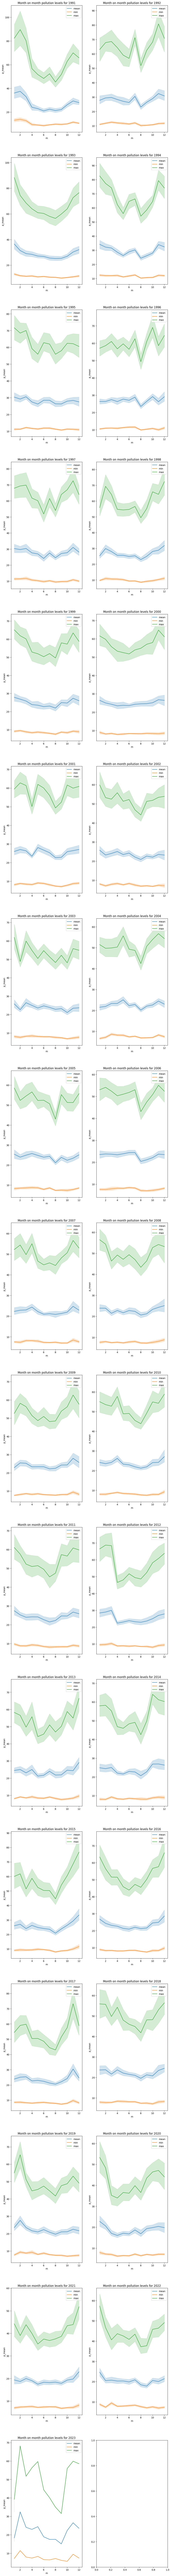

In [92]:
#Monthly over the years

for c in unique_contaminants:
    print(f"Showing for {c}")
    unique_years = daily_p_df[year].unique()
    cur_df = pollutant_dfs[f"daily_{c}"]
    fig, axs = plt.subplots(len(unique_years) // 2 + 1, 2, figsize=(12,len(unique_years) * 6))#constrained_layout=True)
    for idx,y in enumerate(unique_years):
        year_df = cur_df[cur_df[year] == y]
        cur_ax = axs[ idx//2, idx % 2]
        cur_ax.set_title(f"Month on month pollution levels for {c} in {int(y)}")
        cur_ax.set_ylabel('Pollution amount ')
        sns.lineplot(data=year_df, x=month, y=p_mean, label = 'mean', ax=cur_ax)
        sns.lineplot(data=year_df, x=month, y=p_min, label = 'min', ax=cur_ax)
        sns.lineplot(data=year_df, x=month, y=p_max, label = 'max', ax=cur_ax)
    plt.show()

For most years, there's spikes at the start and end of the year ( or rather, a dip in the middle of the year )

We'll take a look further at 6 significant pollutants outlined by WHO air quality guidelines: https://www.iqair.com/us/newsroom/2021-WHO-air-quality-guidelines

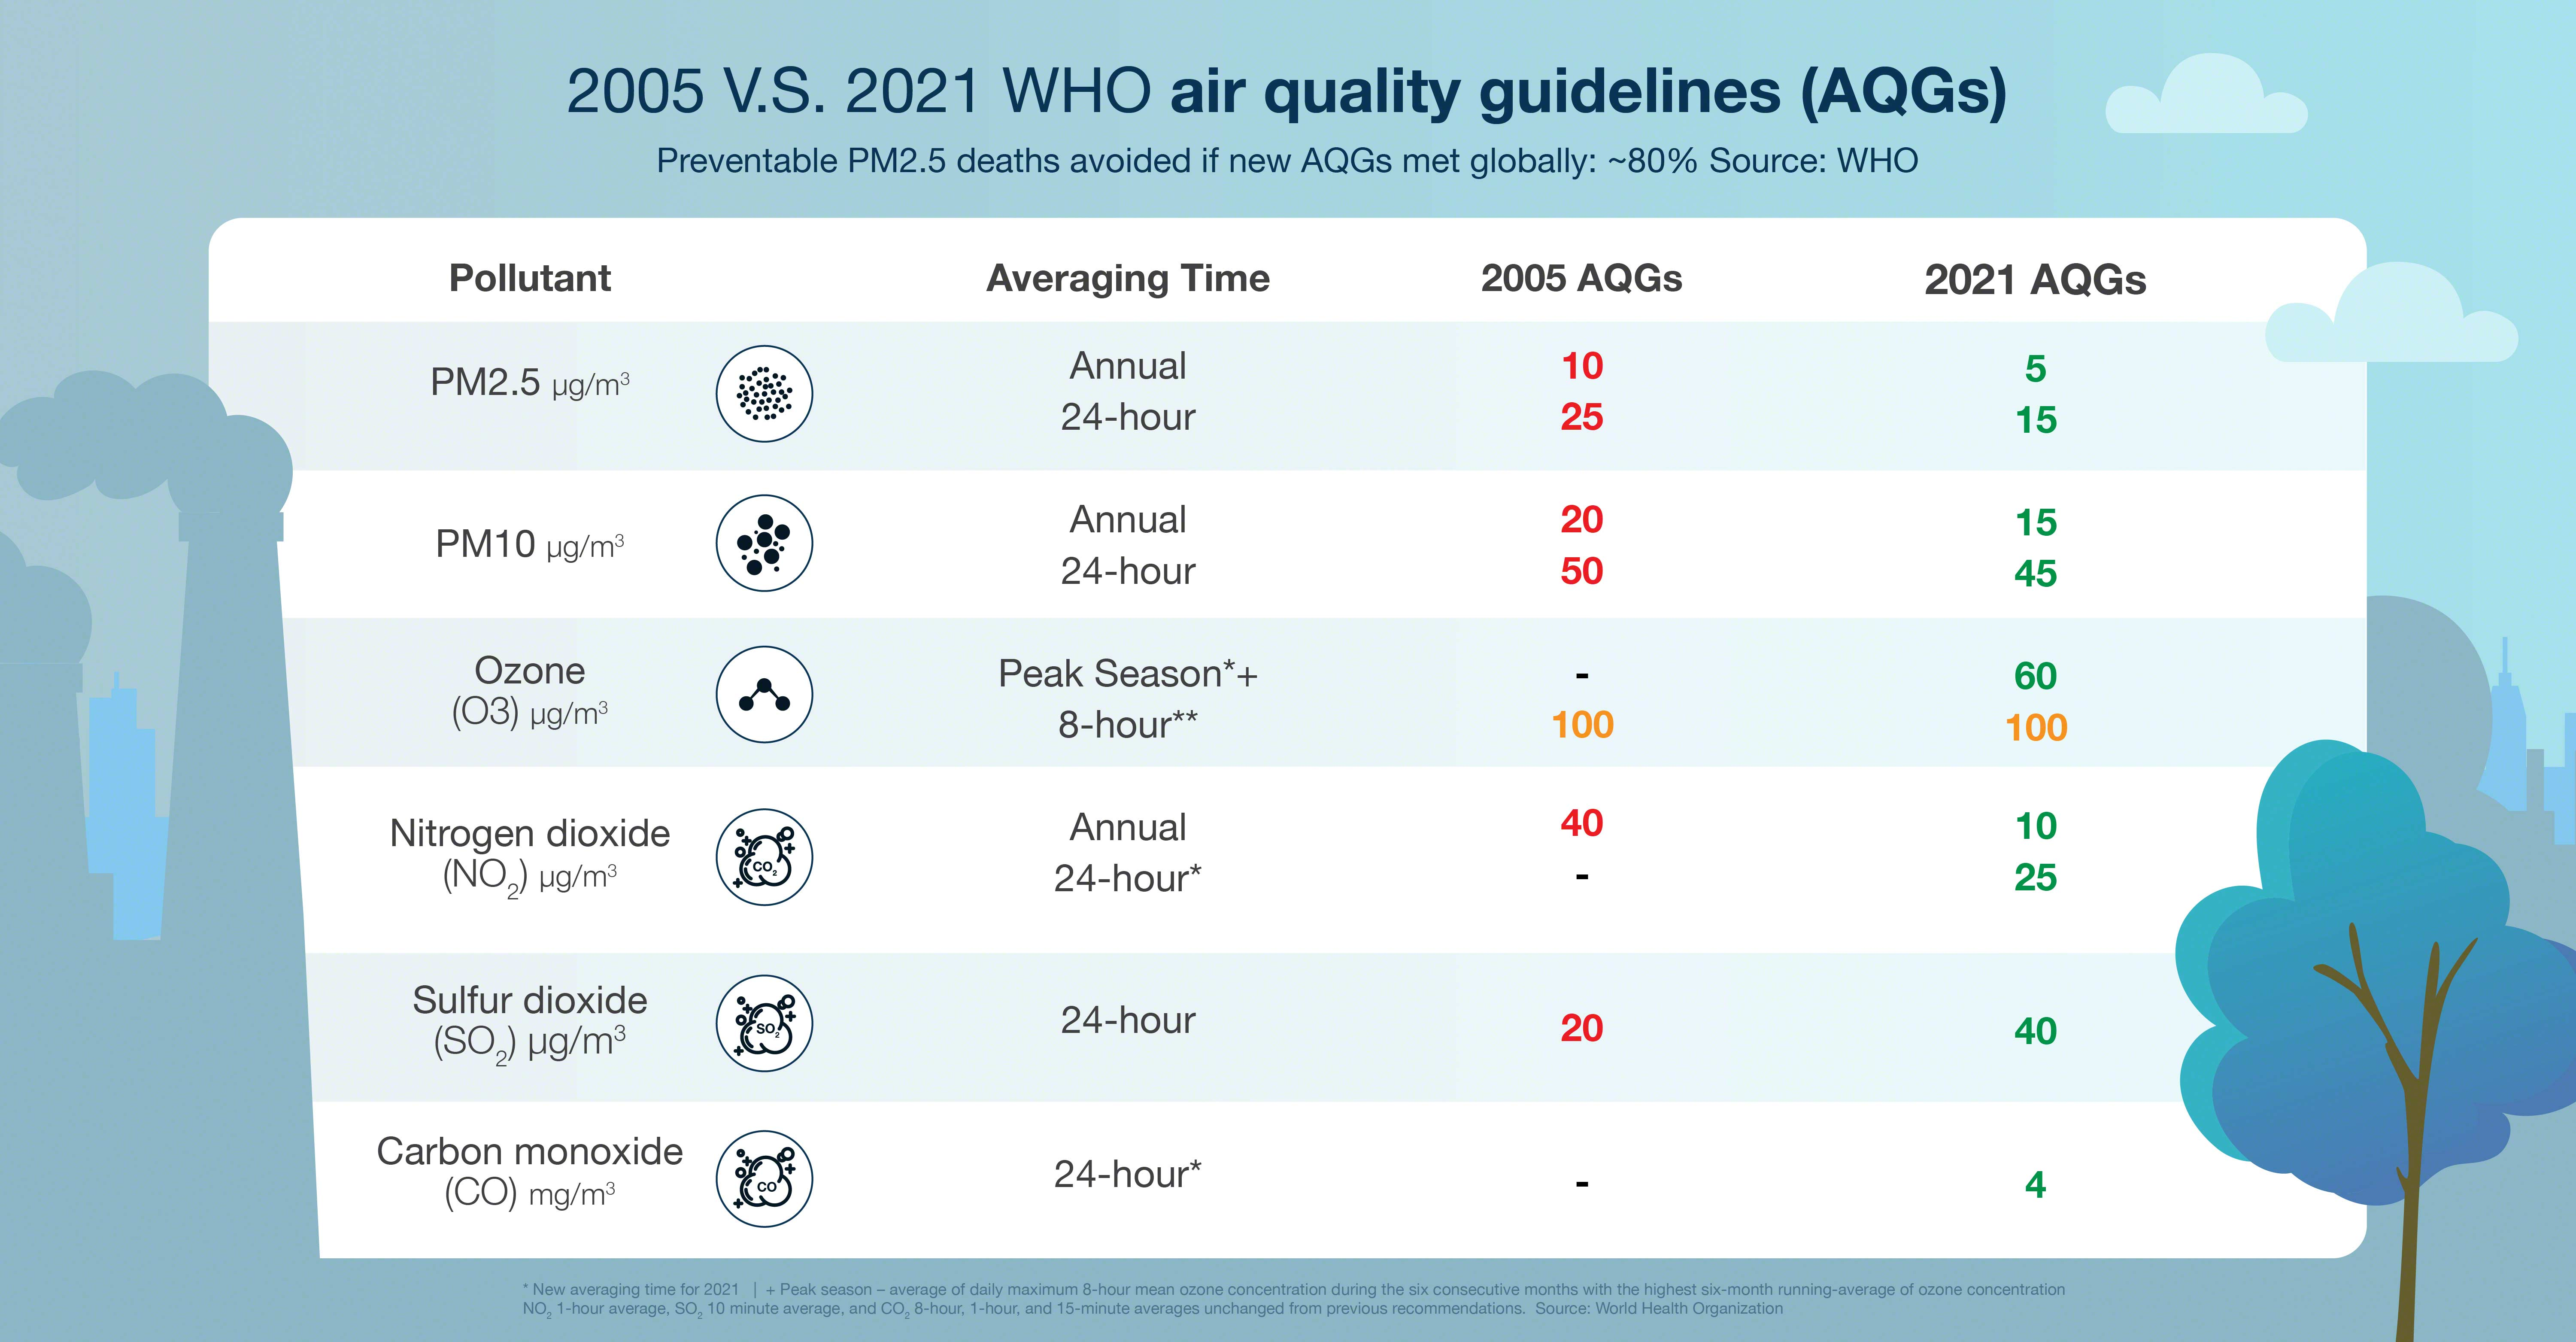



## MONTHLY

PM10
- early years have massive spikes of 50+ microgram/m3 (and usually in the middle of the year)
- Used to be generally above 100 microgram/m3
- Monthly mean and max PM10 starts to drop from 2006 onwards from slightly above 100 to about 50 for max PM10 value for the month
- Over most of the years, there are still significant spikes in PM10 mid year reltaive to the general level of PM10 throughout the year

PM 2.5
- Most years have spikes at the start/end of year
- General decrease of pm2.5 levels from mean 20 to mean 10, max 80+ to max 40

Ozone
- For all years from 1991-2022 except 2023, generally logartihmic increase and exponential decrease, peaking in the middle of the year
- Generally the mean o3 levels doubled from 1991 to 2022, with a significant decrease back to about 25+ mean in 2023

NO2
- Generally increase at the start/end of year
- N02 max levels have generally been above 70, aand gradually decreased to about 50 in 2023

## Hourly trends each year

In [ ]:
#Monthly over the years
for c in unique_contaminants:
    print(f"Showing for {c}")
    cur_df = pollutant_dfs[f"daily_{c}"]
    unique_years = cur_df[year].unique()
    for y in unique_years:
        year_df = cur_df[cur_df[year] == y]
#         print(year_df.head(50))
        mean_df = year_df.mean()
#         print(mean_df.head())
        fig, ax = plt.subplots(figsize=(12, 6))
        sns.lineplot(data=mean_df[hours], label = 'mean', ax=ax)
#         sns.lineplot(data=year_df, x=month, y=p_min, label = 'min', ax=ax)
#         sns.lineplot(data=year_df, x=month, y=p_max, label = 'max', ax=ax)
        title = f"Hour on Hour pollution levels for {c} in {int(y)}"
        ax.set_ylabel(f'Pollution amount {c_units[c]}')
        plt.title(title)
        save_dir = f"pollutantPlots/hourly_yearly/{c}"
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(f'{save_dir}/{c}_{int(y)}.png')  # Repo will contain all the plots labelled
        

Showing for PM10


/tmp/ipykernel_51945/2898991103.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(12, 6))


Showing for NOX
Showing for NO
Showing for NO2
Showing for SO2
Showing for CO
Showing for O3
Showing for H2S
Showing for C6H6
Showing for PM2.5
Showing for Hg
Showing for PM1
Showing for Cl2
Showing for HCT


In [124]:
unique_station_names = df["NOM ESTACIO"].unique()
print(len(unique_station_names))

116


In [22]:
unique_municipals = df[city_col].unique()
print(unique_municipals)
print(len(unique_municipals))

['Tarragona' 'Montseny' 'Mollet del Vallès' 'Martorell' 'Manlleu'
 'Igualada' 'Granollers' 'Gavà' 'Constantí' 'Sant Andreu de la Barca'
 'Rubí' 'Barcelona' 'Santa Perpètua de Mogoda' 'Sant Adrià de Besòs'
 'Berga' 'Sant Celoni' 'Terrassa' 'Tona' 'Mataró' 'Vic' 'Viladecans'
 'Santa Coloma de Gramenet' 'Sant Vicenç dels Horts' 'Barberà del Vallès'
 'Manresa' 'Vilafranca del Penedès' 'Cubelles' 'Vilanova i la Geltrú'
 'Sabadell' 'Santa Margarida i els Monjos' "Hospitalet de Llobregat, l'"
 'Agullana' 'Begur' 'Prat de Llobregat, el' 'Girona' 'Montcada i Reixac'
 'Sant Cugat del Vallès' 'Pardines' 'Santa Pau' 'Bellver de Cerdanya'
 'Juneda' 'Pallejà' 'Lleida' 'Santa Maria de Palautordera' 'Ponts'
 'Sant Esteve de la Sarga' 'Sort' 'Alcanar' 'Alcover' "Ametlla de Mar, l'"
 'Amposta' 'Sénia, la' 'Flix' 'Gandesa' 'Guiamets, els' 'Perafort' 'Reus'
 'Badalona' "Vandellòs i l'Hospitalet de l'" 'Vila-seca' 'Sitges'
 'Castellet i la Gornal' 'Sant Feliu de Llobregat' 'Sant Just Desvern'
 'Cornellà de

In [20]:
# Let's analyze pollution across a few locations
# Should note certain areas are cities and some are more nature
# e.g. Tarragona,  Mollet del Vallès, Alcanar, Ripollet are (coastal) cities
# e.g. Montseny,  Tona  seems like a mountain town
some_cities = ['Tarragona', 'Montseny', 'Mollet del Vallès', 'Tona', 'Alcanar','Ripollet']


In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
for c in some_cities:
    cur_df = df[df[city_col] == c]
#     print(cur_df.head())
    sns.lineplot(data=cur_df, x=date_col, y="Energy intensity lower bound", label = 'lower', ax=ax)
    title = f"Altitude vs {c}"
    ax.set_ylabel(f'Pollution amount {c_units[c]}')
    plt.title(title)
    save_dir = f"pollutantPlots/hourly_yearly/{c}"
    os.makedirs(save_dir, exist_ok=True)
    plt.savefig(f'{save_dir}/{c}_{int(y)}.png')  # Repo will contain all the plots labelled

     CODI EOI                NOM ESTACIO        DATA  MAGNITUD CONTAMINANT  \
0    43148003      Tarragona (Bonavista)  25/01/2023        10        PM10   
307  43148001  Tarragona (Sant Salvador)  25/01/2023        12         NOX   
308  43148001  Tarragona (Sant Salvador)  25/01/2023         1         SO2   
309  43148001  Tarragona (Sant Salvador)  25/01/2023        65         H2S   
311  43148001  Tarragona (Sant Salvador)  25/01/2023         7          NO   

    UNITATS TIPUS ESTACIO AREA URBANA  CODI INE   MUNICIPI  CODI COMARCA  \
0     µg/m3    industrial    suburban     43148  Tarragona            36   
307   µg/m3       traffic    suburban     43148  Tarragona            36   
308   µg/m3       traffic    suburban     43148  Tarragona            36   
309   µg/m3       traffic    suburban     43148  Tarragona            36   
311   µg/m3       traffic    suburban     43148  Tarragona            36   

    NOM COMARCA   01h  02h   03h   04h   05h   06h   07h   08h   09h   10h

     CODI EOI NOM ESTACIO        DATA  MAGNITUD CONTAMINANT UNITATS  \
238  43004005     Alcanar  25/01/2023        12         NOX   µg/m3   
239  43004005     Alcanar  25/01/2023         7          NO   µg/m3   
240  43004005     Alcanar  25/01/2023         8         NO2   µg/m3   
585  43004005     Alcanar  24/01/2023         8         NO2   µg/m3   
586  43004005     Alcanar  24/01/2023         7          NO   µg/m3   

    TIPUS ESTACIO AREA URBANA  CODI INE MUNICIPI  CODI COMARCA NOM COMARCA  \
238    industrial       rural     43004  Alcanar            22     Montsià   
239    industrial       rural     43004  Alcanar            22     Montsià   
240    industrial       rural     43004  Alcanar            22     Montsià   
585    industrial       rural     43004  Alcanar            22     Montsià   
586    industrial       rural     43004  Alcanar            22     Montsià   

     01h  02h  03h  04h  05h  06h  07h  08h  09h  10h  11h  12h  13h  14h  \
238  2.0  1.0  1.0  1.0  1.

### Hourly

PM2.5: In the past decade, generally best time is 1500, worse is 8am and midnight

PM10: Best: 5am, Worst, 10am

Ozone: Best 8-9am, Worst 4-5pm

NO2: Best 5am and 3-4pm , Worst 10am and 10pm 

S02: Best 11pm - 6am, worst is 11am-2pm

CO: 5am and 3-4pm, worst 8am and 8-10 pm

### Analyze the relationship between altitude and concentration of particles in the air, and present your conclusions in graphical form. (10 points)

In [138]:
df.head()

CODI EOI             NOM ESTACIO       DATA  MAGNITUD CONTAMINANT UNITATS  \
0  43148003   Tarragona (Bonavista) 2023-01-25        10        PM10   µg/m3   
1   8137001  Montseny (La Castanya) 2023-01-25        12         NOX   µg/m3   
2   8124009       Mollet del Vallès 2023-01-25         7          NO   µg/m3   
3   8114006               Martorell 2023-01-25         7          NO   µg/m3   
4   8112003                 Manlleu 2023-01-25         8         NO2   µg/m3   

  TIPUS ESTACIO AREA URBANA  CODI INE           MUNICIPI  CODI COMARCA  \
0    industrial    suburban     43148          Tarragona            36   
1    background       rural      8137           Montseny            41   
2       traffic    suburban      8124  Mollet del Vallès            41   
3    background    suburban      8114          Martorell            11   
4    background    suburban      8112            Manlleu            24   

       NOM COMARCA   01h   02h   03h   04h   05h   06h   07h    08h   09h  \
0       Tarragonès  11.0   9.0  12.0  12.0  11.0  12.0  15.0   18.0  19.0   
1  Vallès Oriental   2.0   2.0   2.0   2.0   2.0   2.0   2.0    1.0   1.0   
2  Vallès Oriental  49.0  32.0  59.0  43.0  25.0  33.0  98.0  123.0  58.0   
3   Baix Llobregat   9.0   7.0   3.0   2.0   1.0   2.0   2.0    3.0   5.0   
4            Osona  24.0  23.0  24.0  21.0  21.0  29.0  25.0   26.0  28.0   

    10h   11h   12h   13h   14h   15h   16h   17h   18h   19h   20h   21h  \
0  24.0  22.0  22.0  28.0  24.0  17.0  22.0  18.0  24.0  28.0  29.0  39.0   
1   2.0   2.0   1.0   NaN   NaN   NaN   3.0  14.0   9.0   4.0   3.0   3.0   
2   NaN   NaN  20.0  12.0  11.0   5.0   4.0   9.0  26.0  17.0   7.0  16.0   
3   9.0  11.0  12.0  11.0  12.0   6.0   6.0   5.0   2.0   2.0   4.0   7.0   
4  34.0  24.0  37.0  33.0  26.0  14.0  17.0  21.0  22.0  22.0  35.0  38.0   

    22h   23h   24h  ALTITUD    LATITUD  LONGITUD  \
0  33.0  24.0  20.0       39  41.115910  1.191999   
1   3.0   2.0   2.0      693  41.779280  2.358002   
2  62.0  62.0  58.0       90  41.549183  2.212098   
3   7.0   3.0   1.0       78  41.475384  1.921202   
4  36.0  32.0  28.0      460  42.003307  2.287299   

                 GEOREFERENCIA     p_mean  p_min  p_max     y  m  DOW  
0   POINT (1.1919986 41.11591)  20.541667    9.0   39.0  2023  1    2  
1    POINT (2.358002 41.77928)   3.047619    1.0   14.0  2023  1    2  
2  POINT (2.2120984 41.549183)  37.681818    4.0  123.0  2023  1    2  
3  POINT (1.9212021 41.475384)   5.500000    1.0   12.0  2023  1    2  
4  POINT (2.2872992 42.003307)  26.666667   14.0   38.0  2023  1    2

Showing for PM10


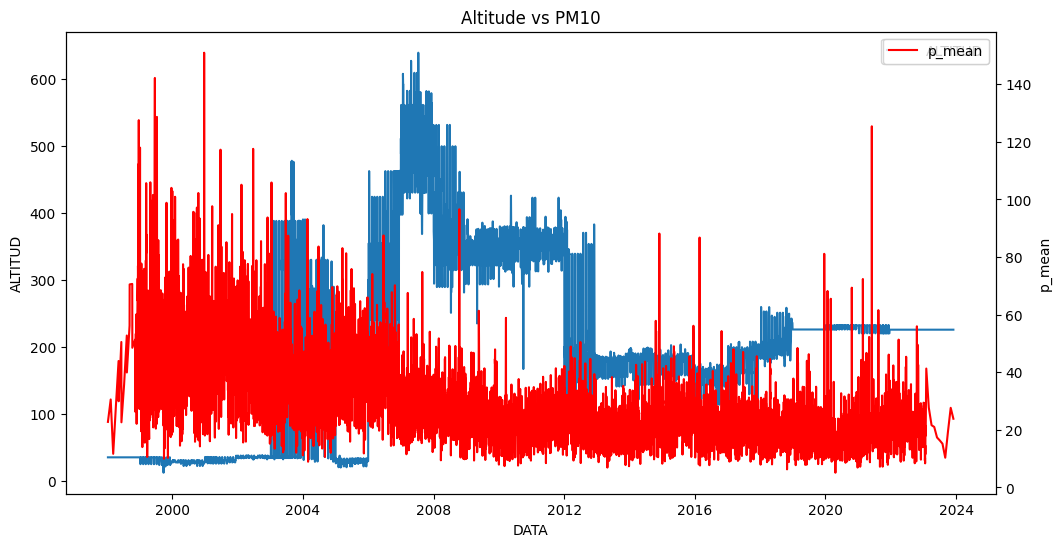

Showing for NOX


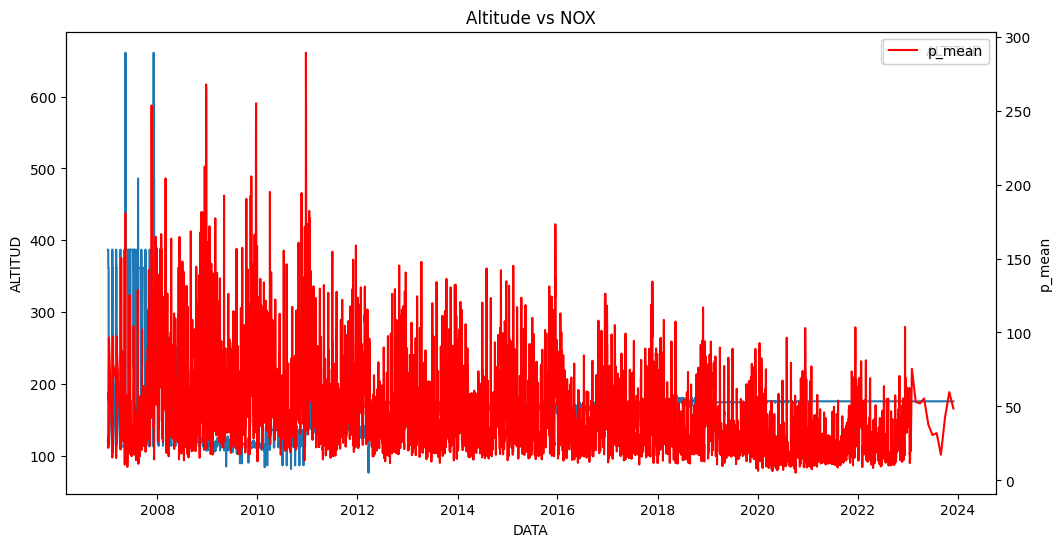

Showing for NO


KeyboardInterrupt: 

In [137]:
#Monthly over the years
for c in unique_contaminants:
    print(f"Showing for {c}")
    cur_df = pollutant_dfs[f"daily_{c}"]
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(data=cur_df, x=date_col, y=altitude, label = altitude, ax=ax)
    ax2 = ax.twinx()
    sns.lineplot(data=cur_df, x=date_col, y=p_mean, label = p_mean, ax=ax2, color="r")
    
    title = f"Altitude vs {c}"
#     ax.set_ylabel(f'Pollution amount {c_units[c]}')
    plt.title(title)
#     save_dir = f"pollutantPlots/hourly_yearly/{c}"
#     os.makedirs(save_dir, exist_ok=True)
#     plt.savefig(f'{save_dir}/{c}_{int(y)}.png')  # Repo will contain all the plots labelled
    
    plt.show()


Showing for PM10
Showing for NOX
Showing for NO
Showing for NO2
Showing for SO2
Showing for CO
Showing for O3
Showing for H2S
Showing for C6H6
Showing for PM2.5
Showing for Hg


/tmp/ipykernel_51945/3132452604.py:5: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=cur_df, x=altitude, y=p_mean, label = c, ax=ax)


Showing for PM1
Showing for Cl2
Showing for HCT
Showing for HCNM
Showing for PS
Showing for HCl


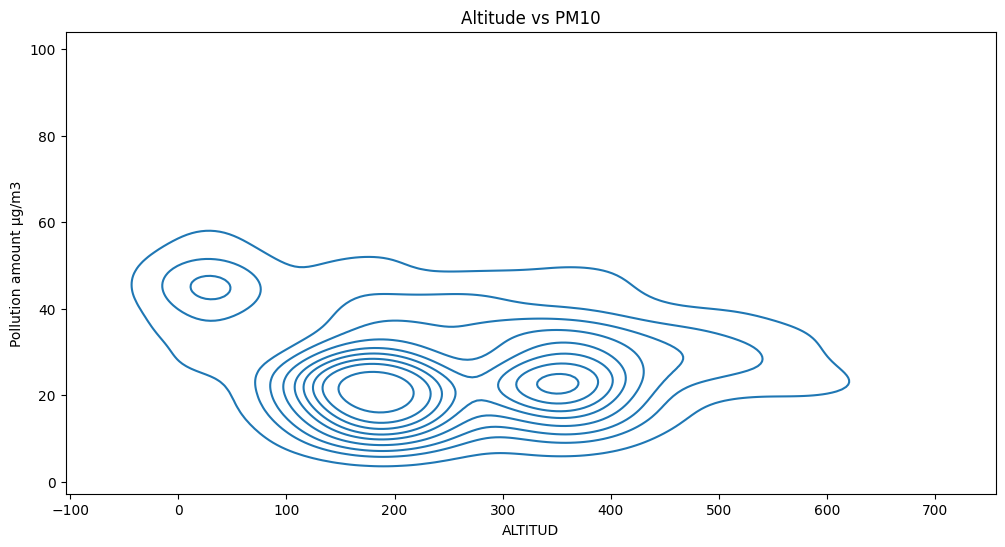

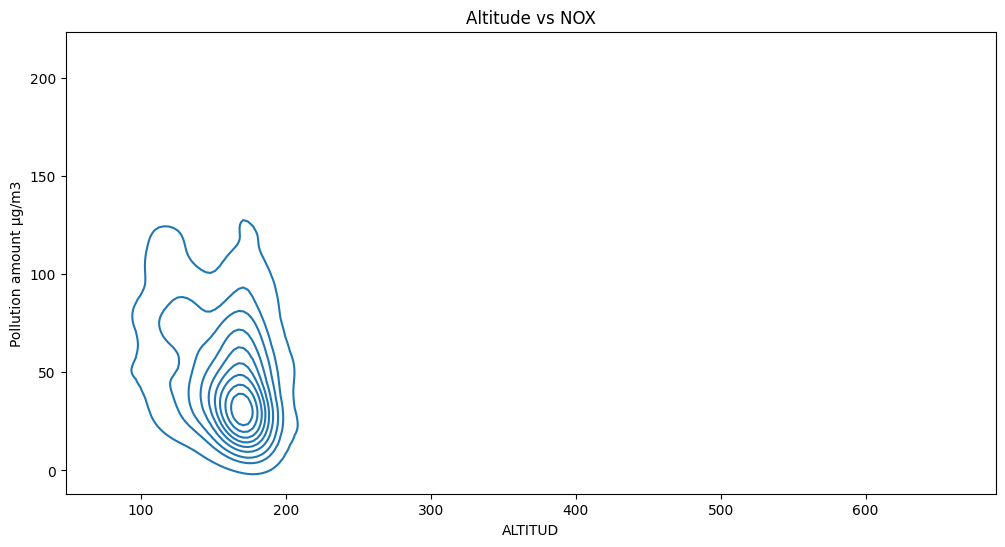

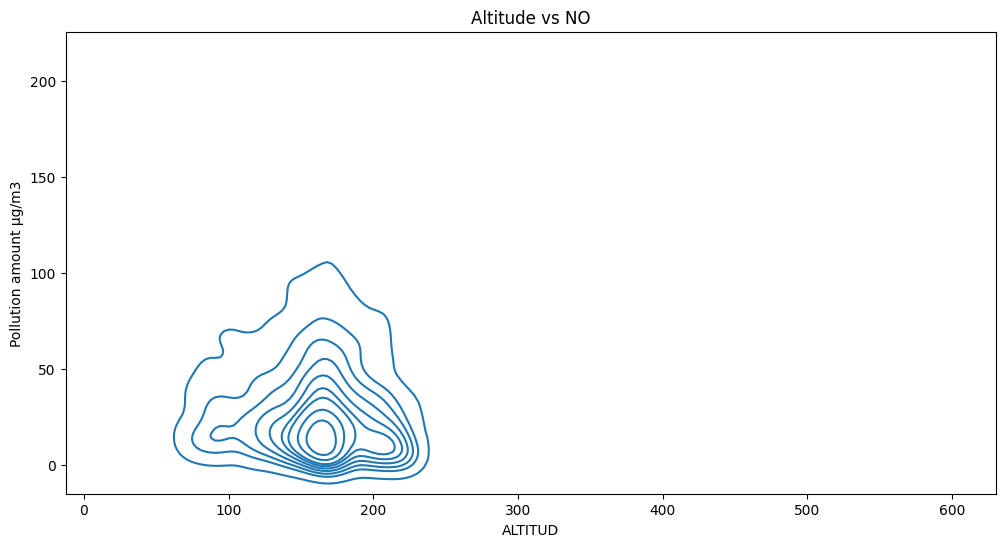

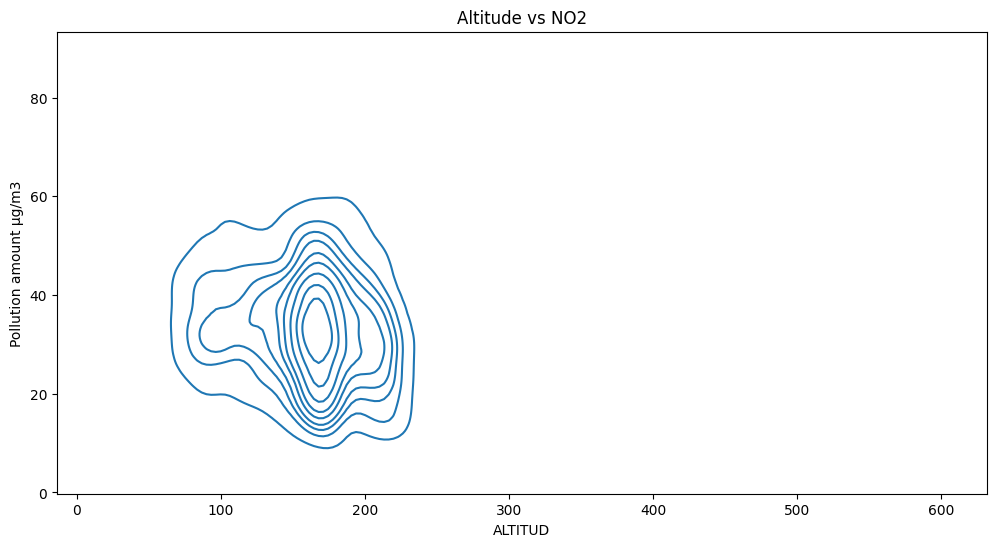

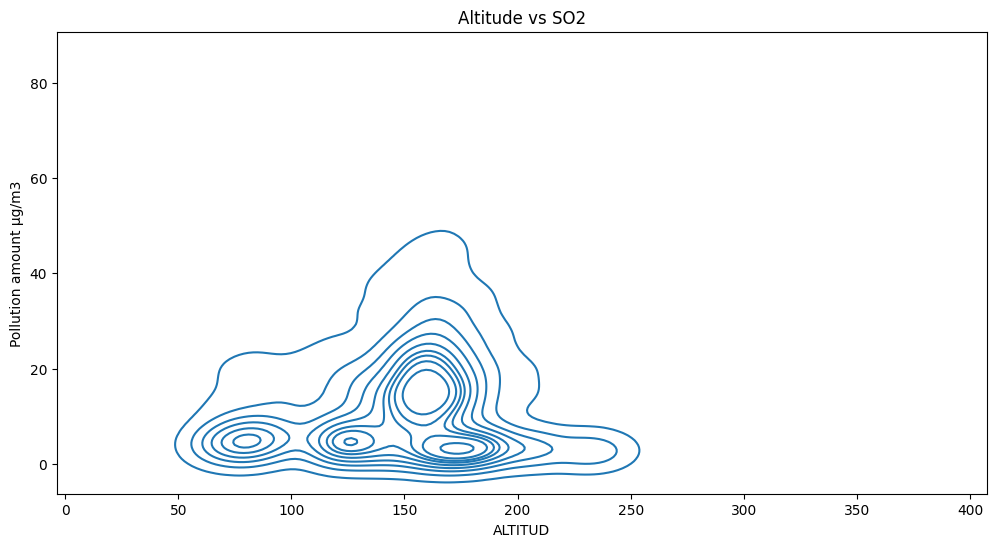

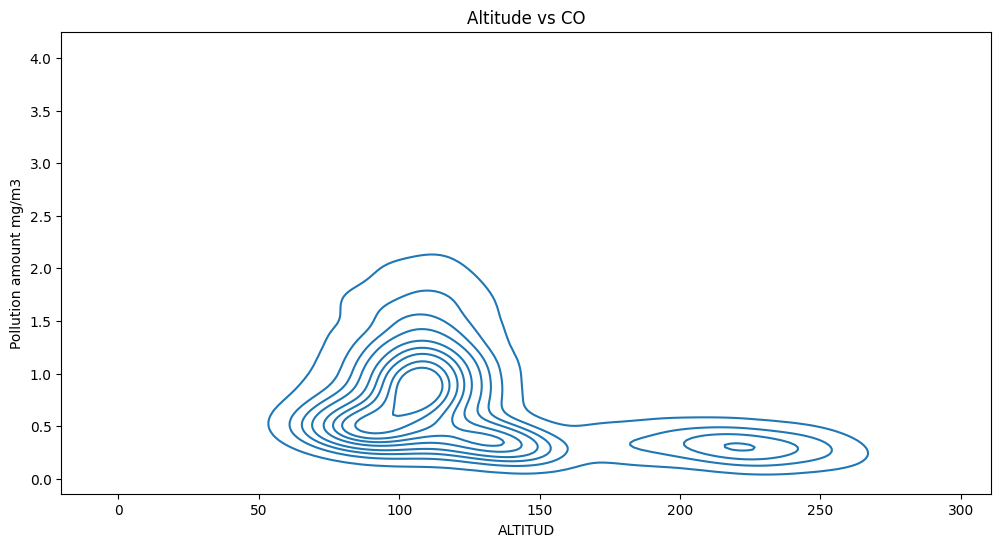

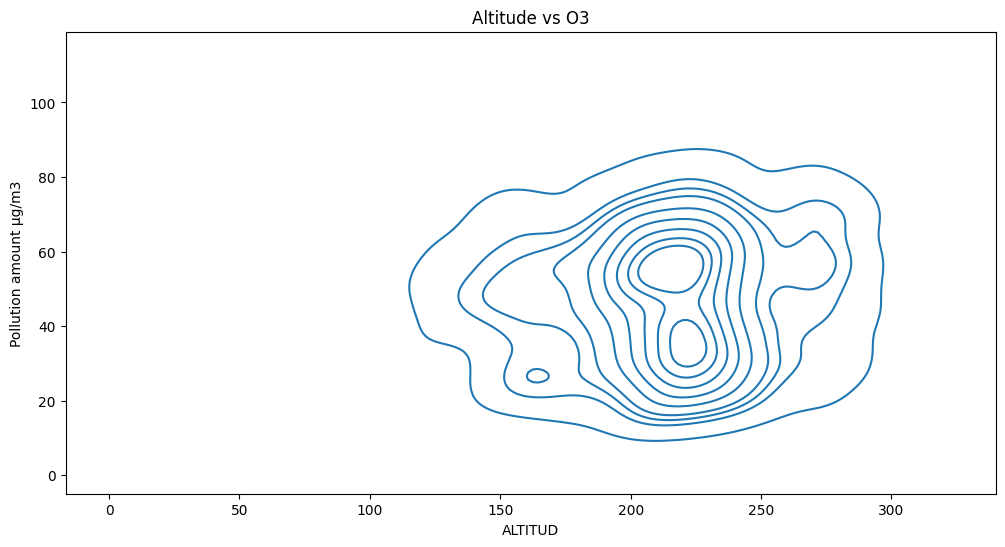

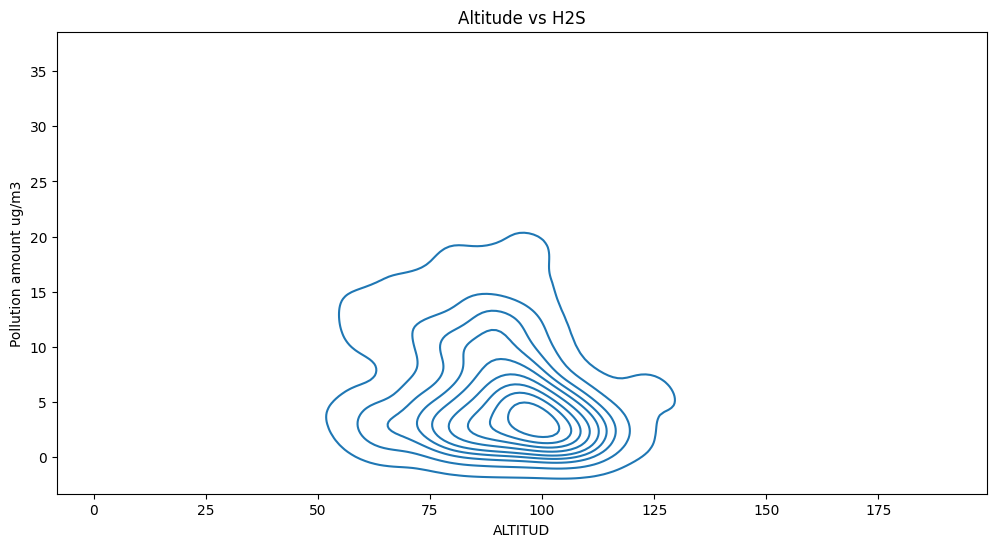

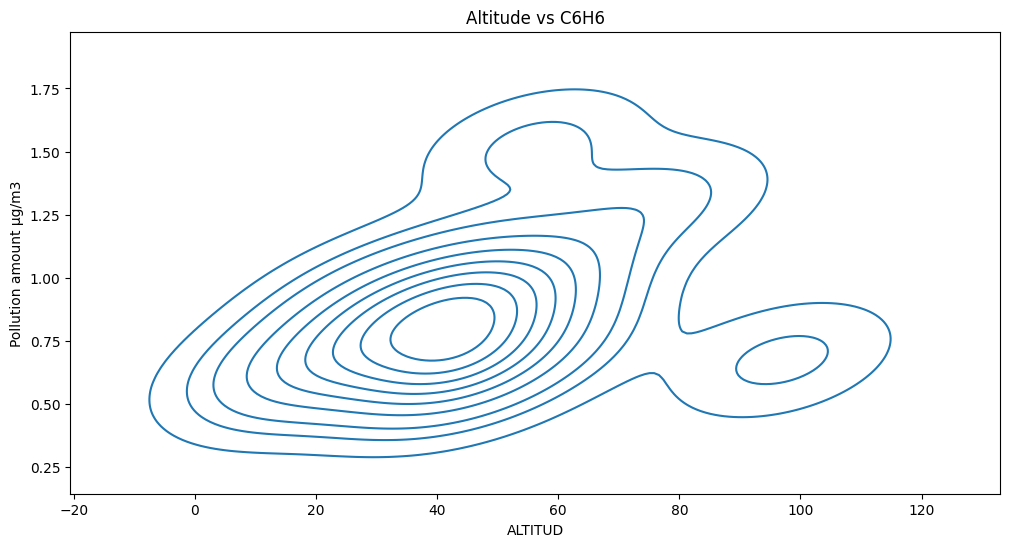

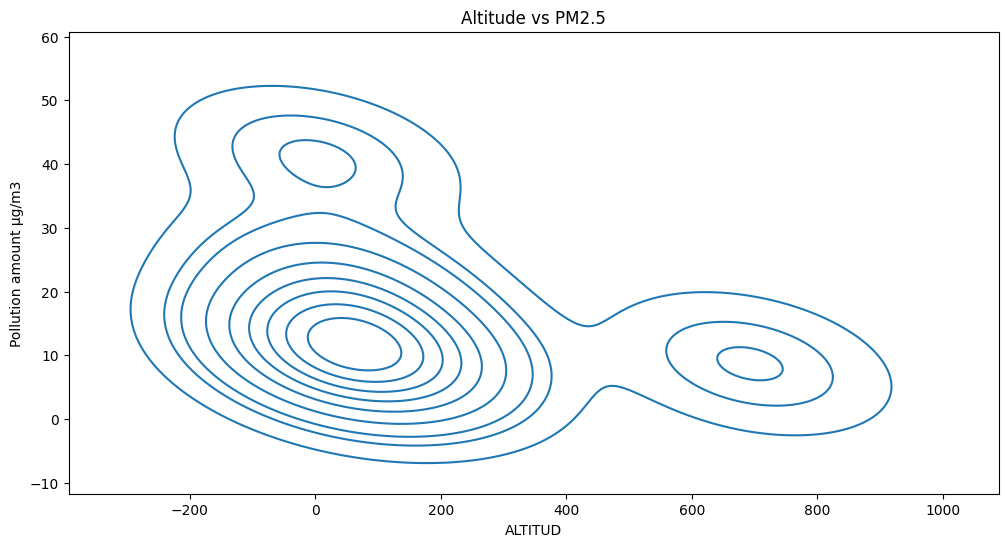

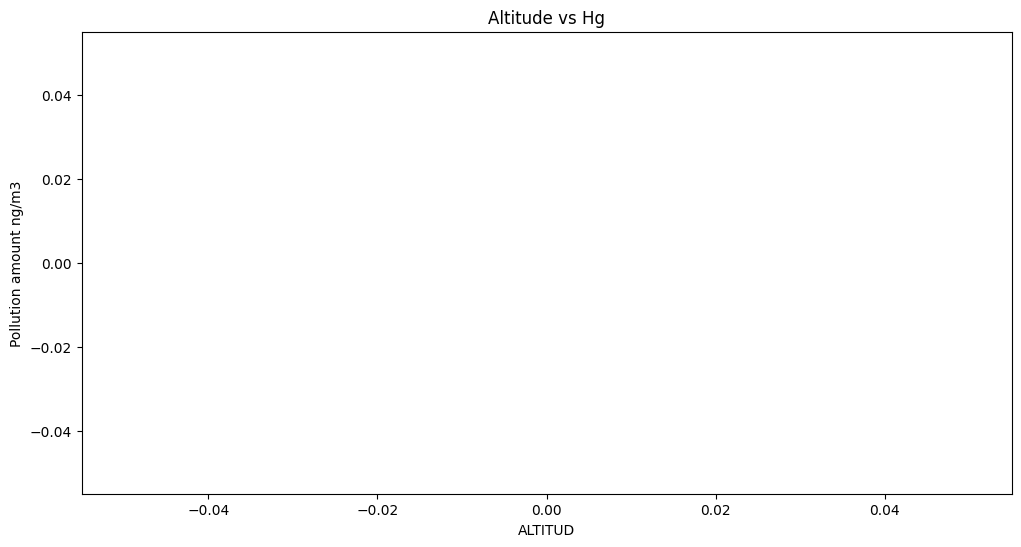

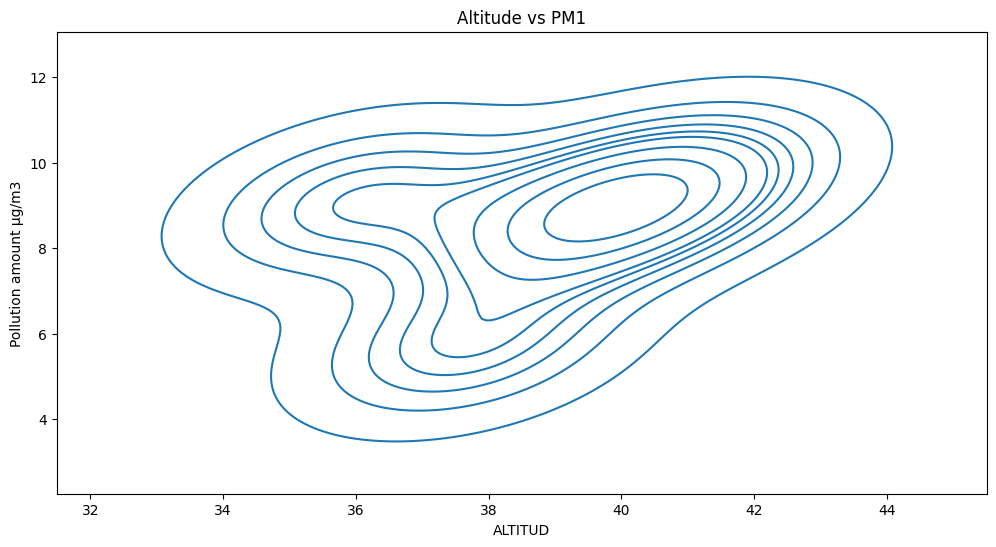

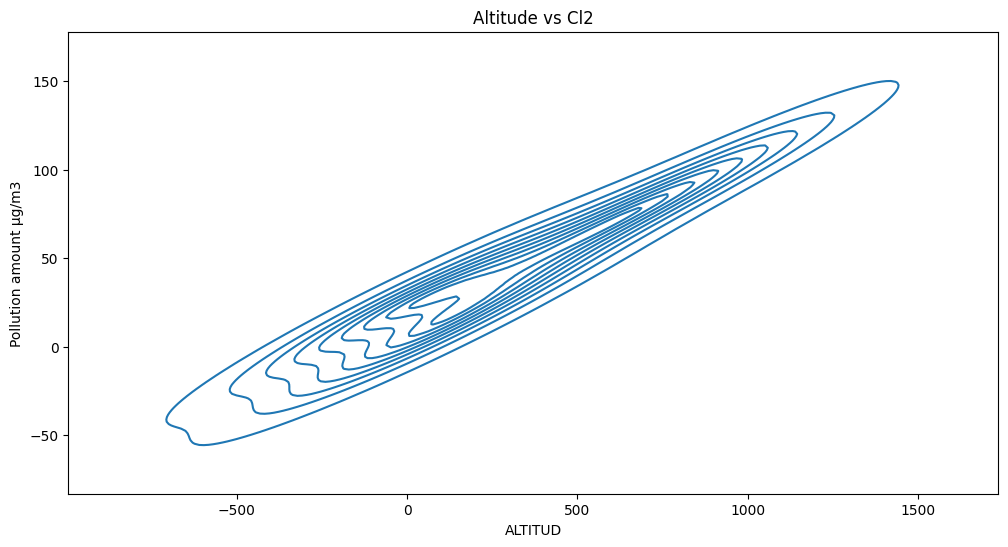

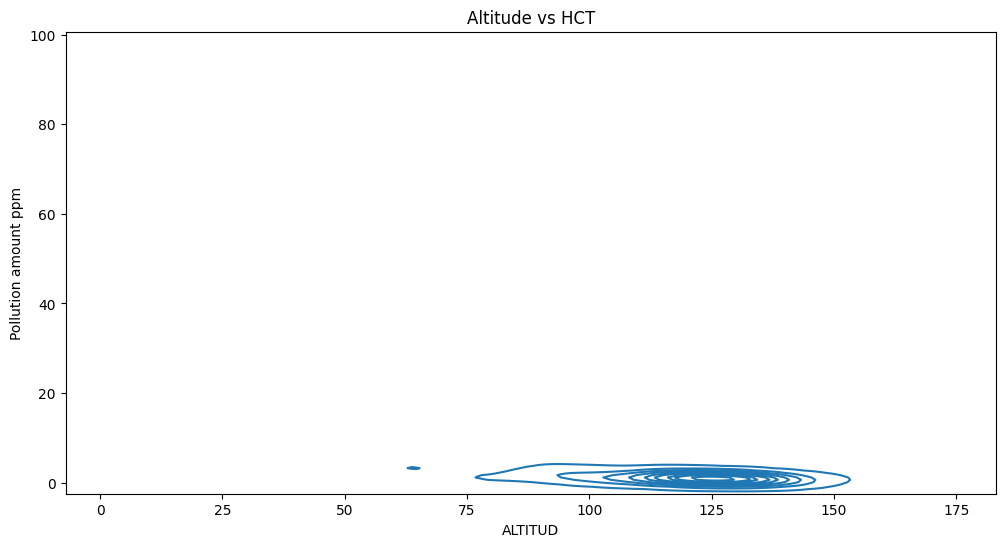

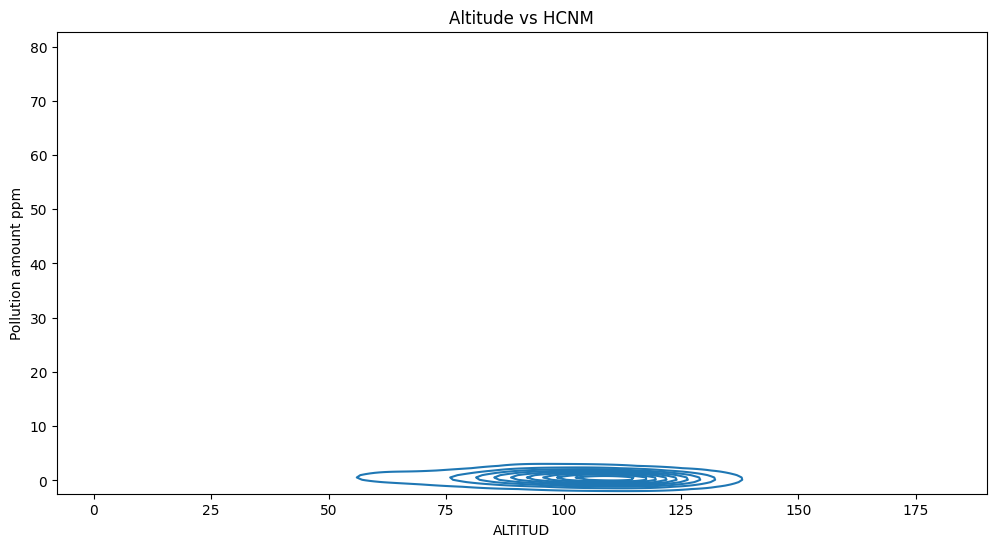

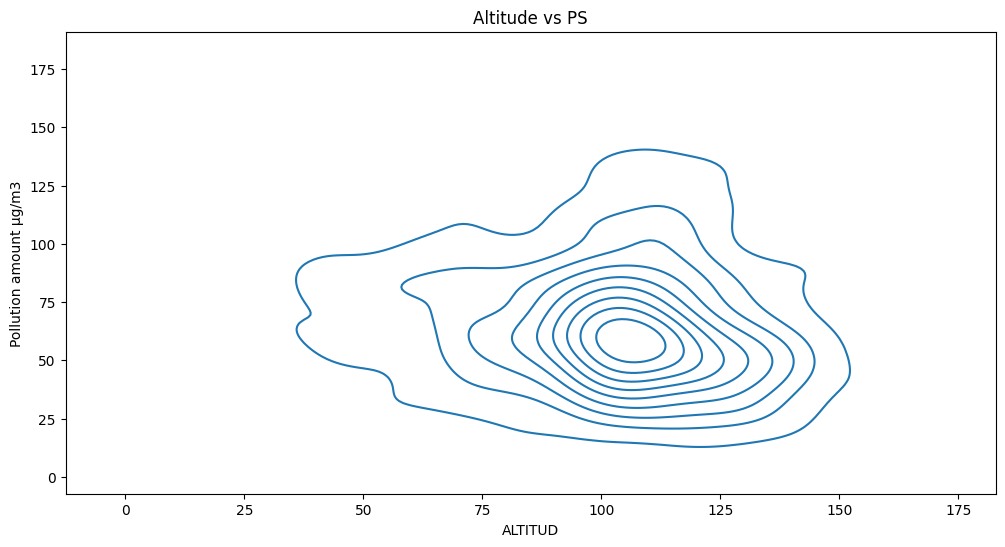

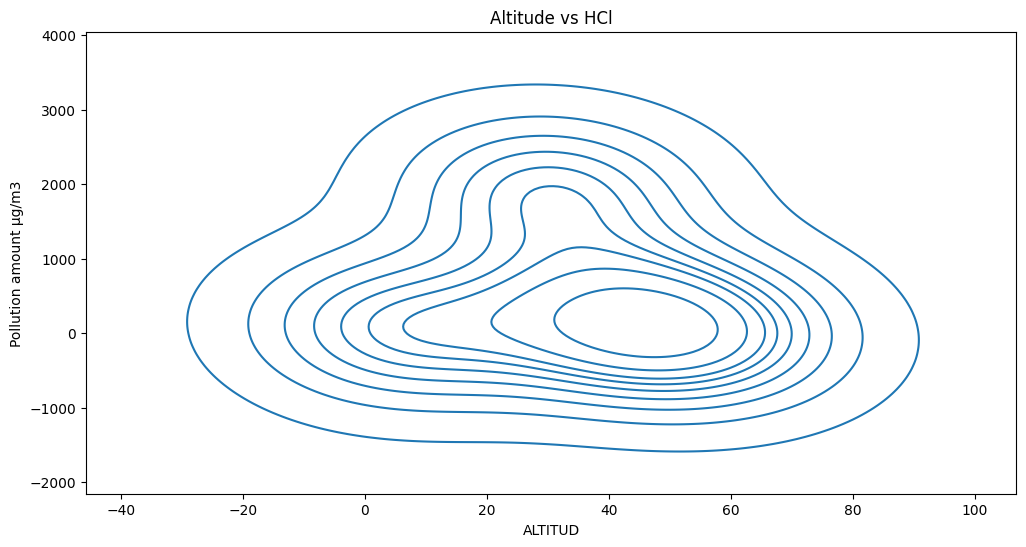

In [144]:
cur_df

There's isn't a direct relationship between altitude and the pollutants, but we can see the distribution of pollutant concentrations against different altitudes shown by the kde plots

E,g, for PM10, measurements done at about 200m altitude are likely to find concentrations at 20

For PM 2.5, there's concentrations measured are usually found around 10 and 40, with 10 likely being found at low and high altitudes 

### Analyze the concentration of pollutants in urban, suburban and rural areas, and present your conclusion in graphical form. (10 points)

Showing for PM10
Showing for NOX
Showing for NO
Showing for NO2
Showing for SO2
Showing for CO
Showing for O3
Showing for H2S
Showing for C6H6
Showing for PM2.5
Showing for Hg
Showing for PM1
Showing for Cl2
Showing for HCT
Showing for HCNM
Showing for PS
Showing for HCl


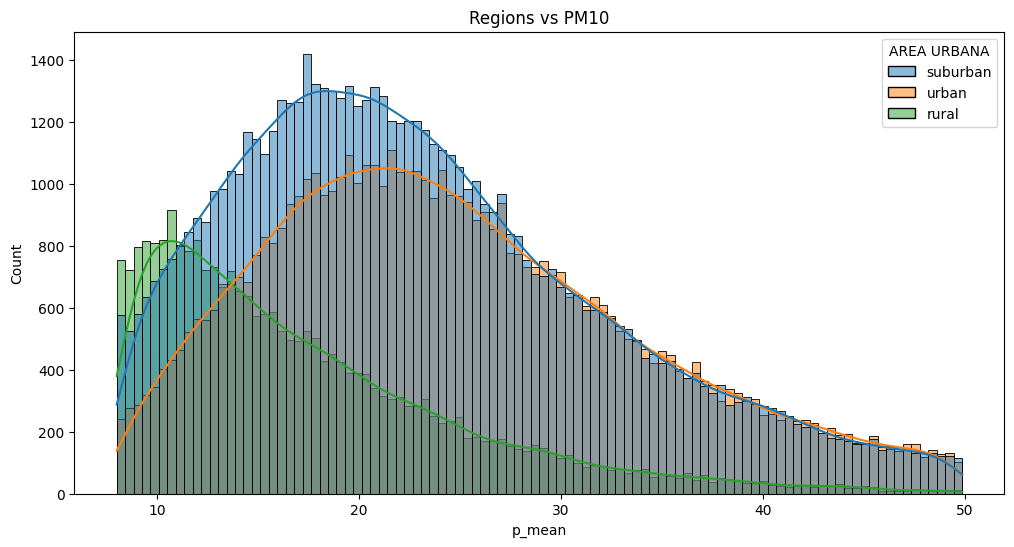

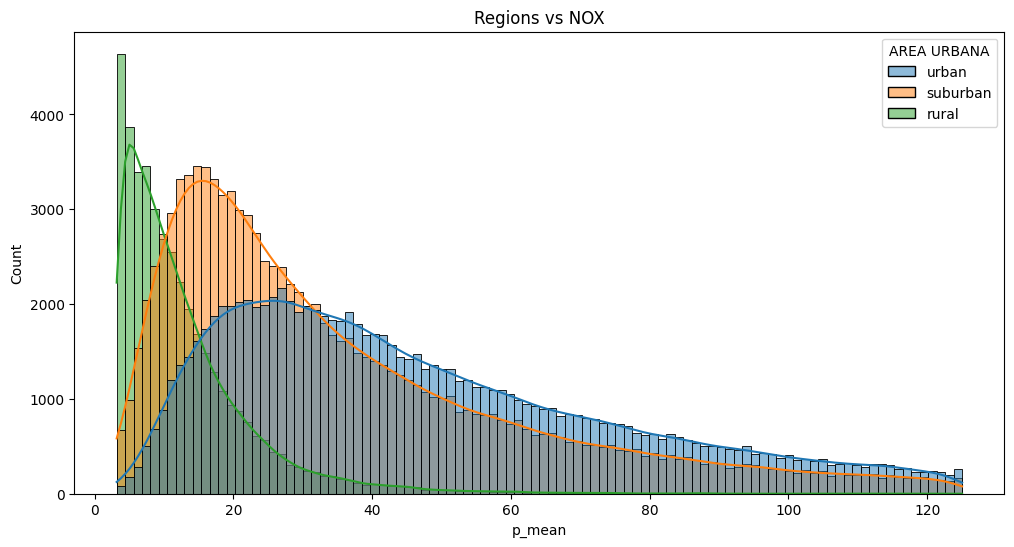

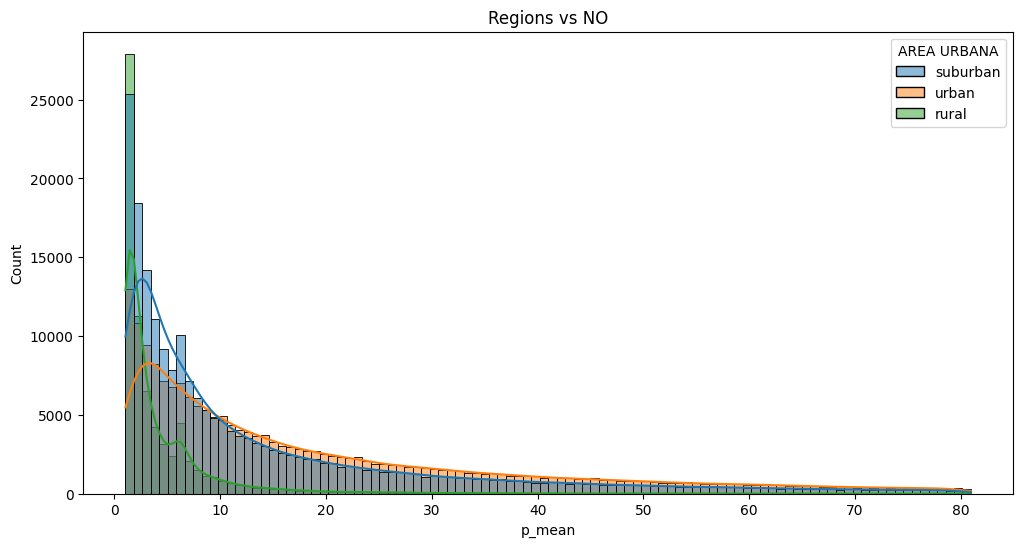

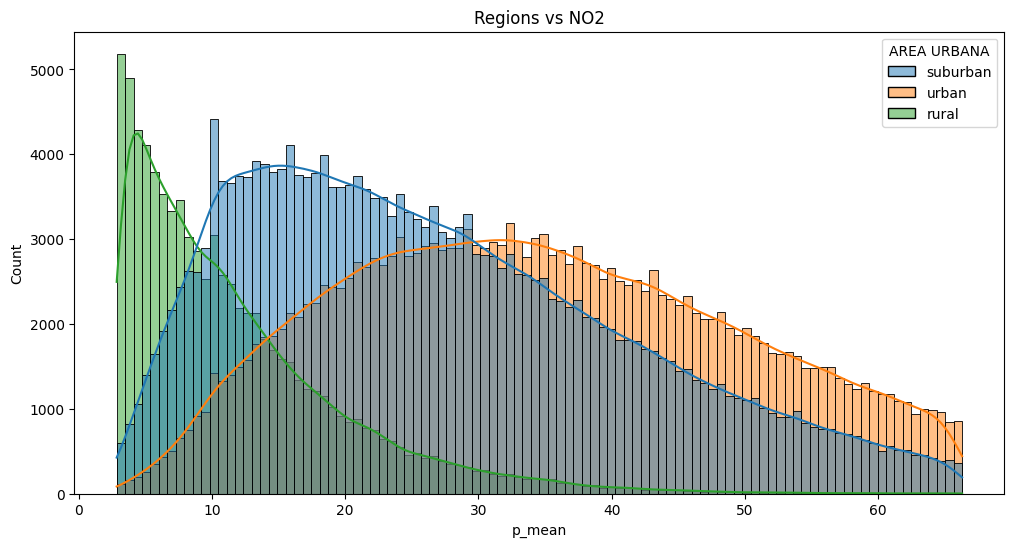

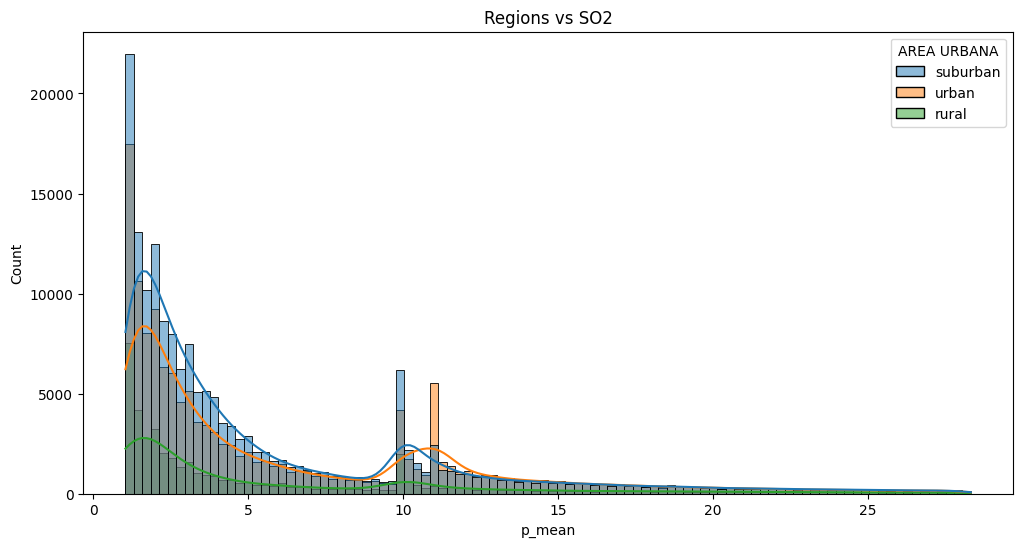

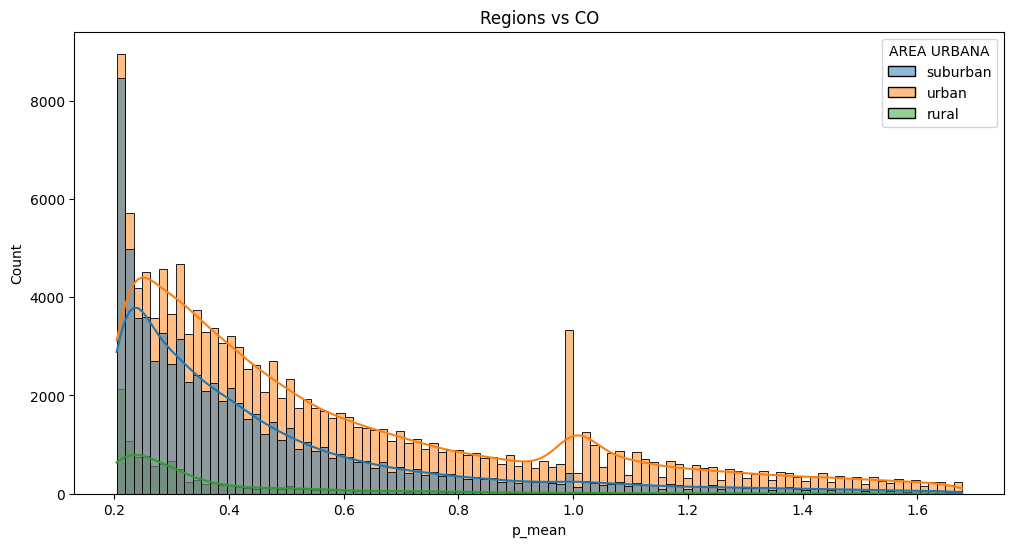

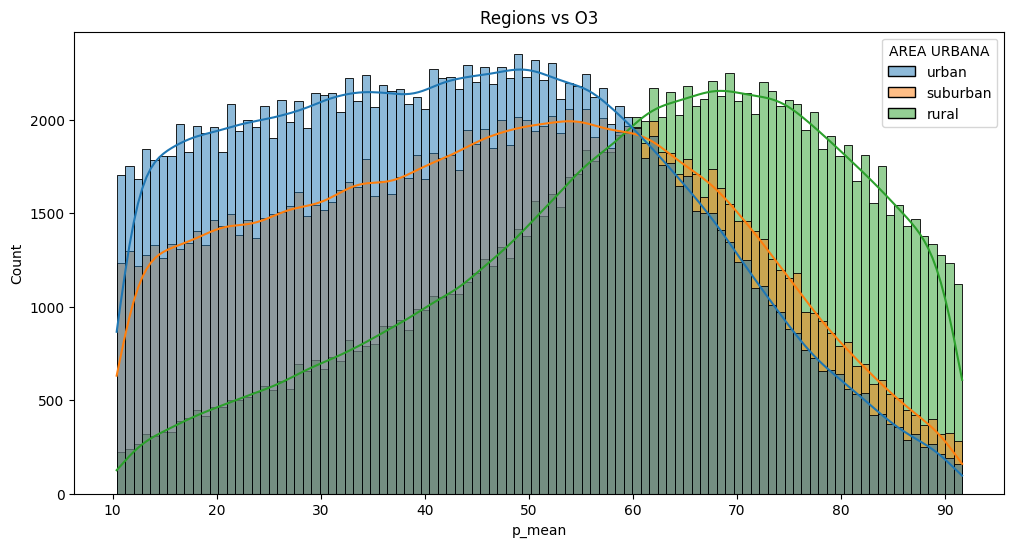

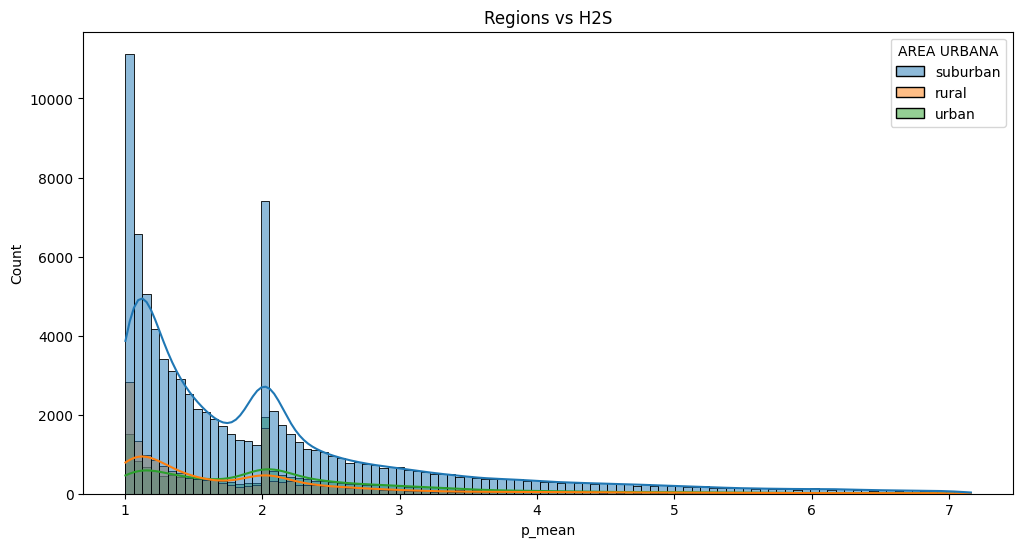

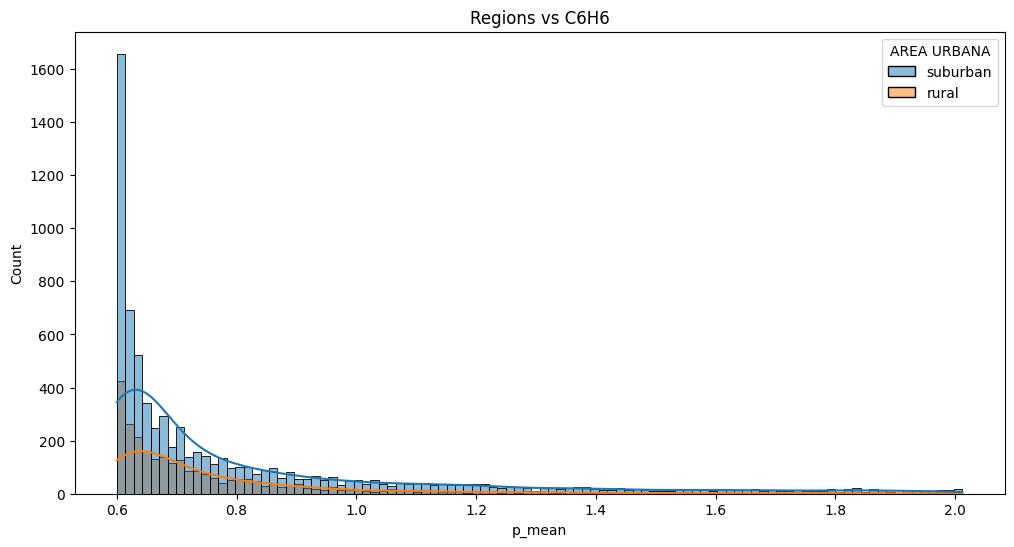

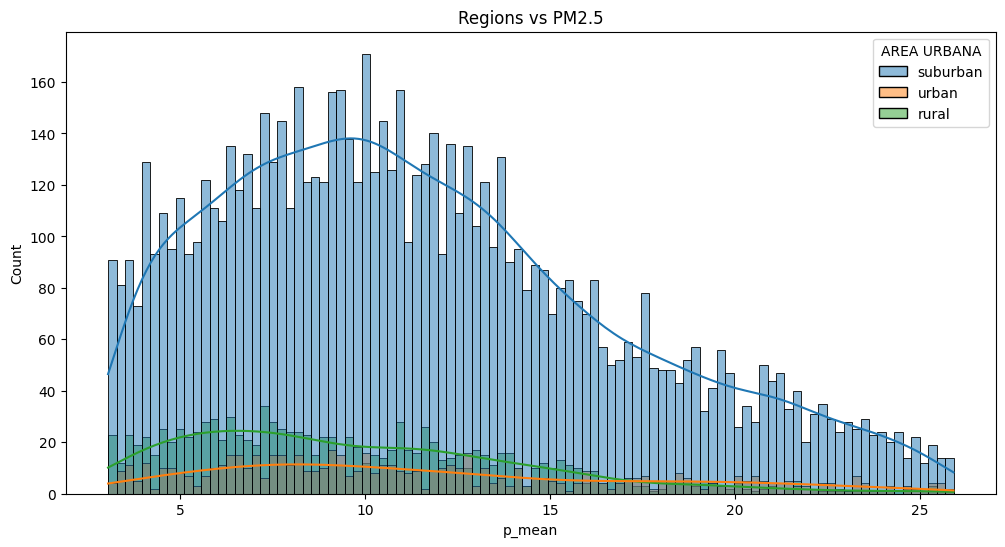

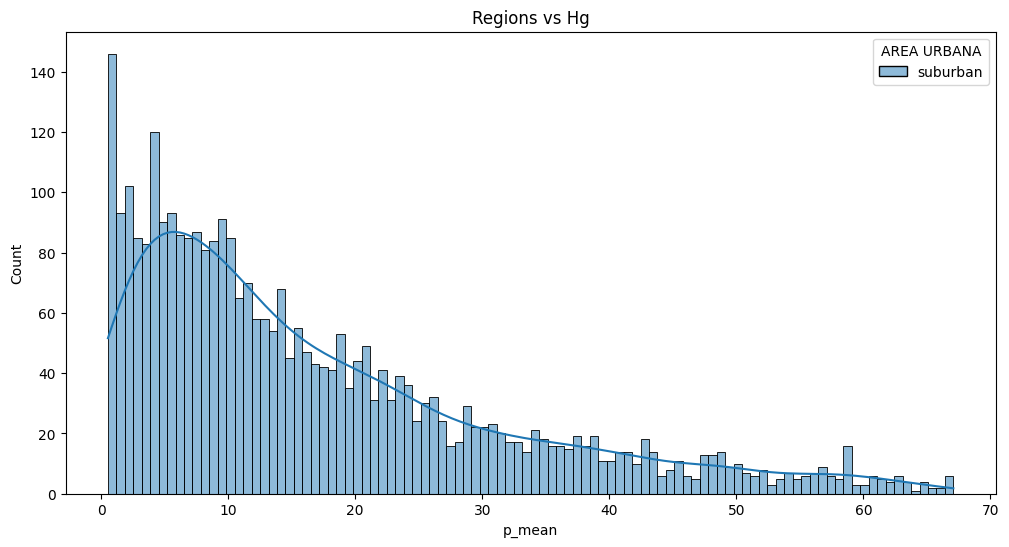

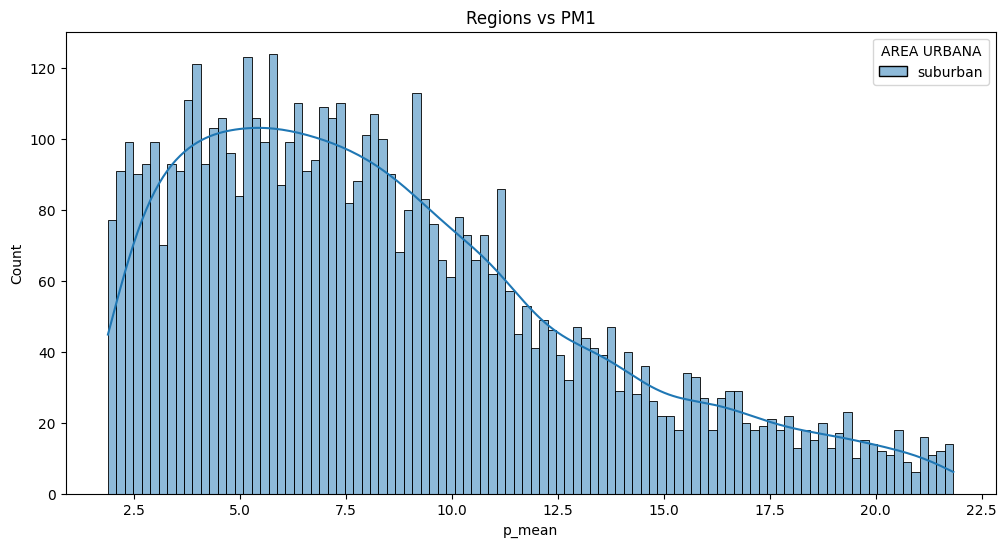

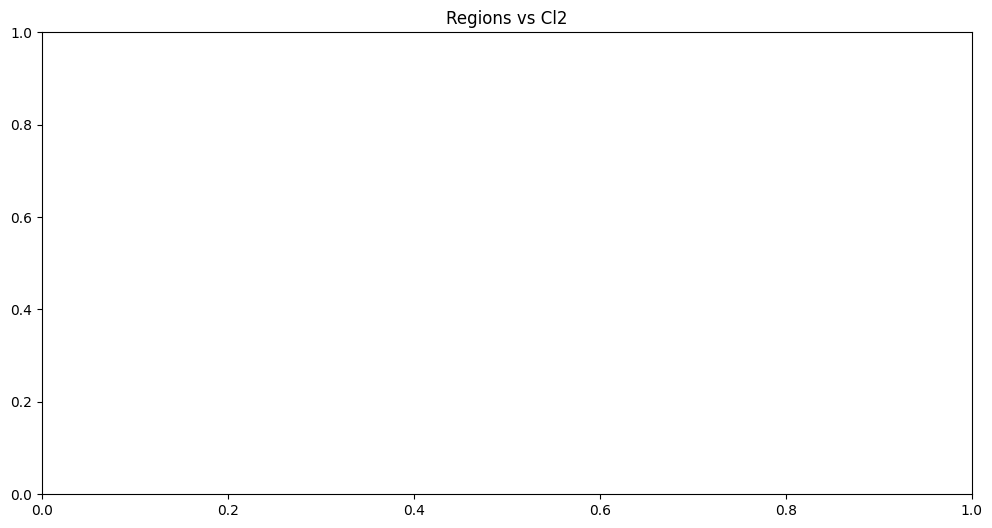

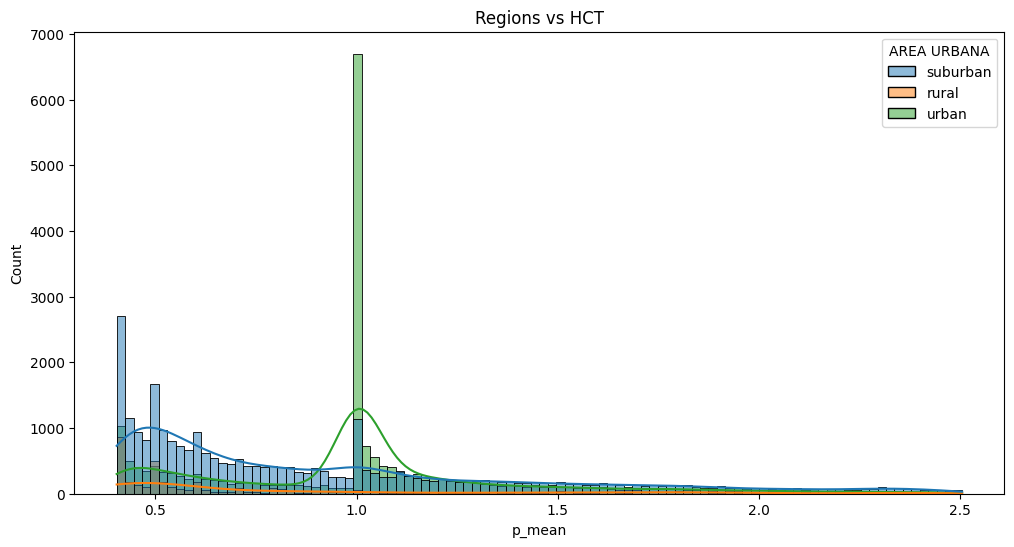

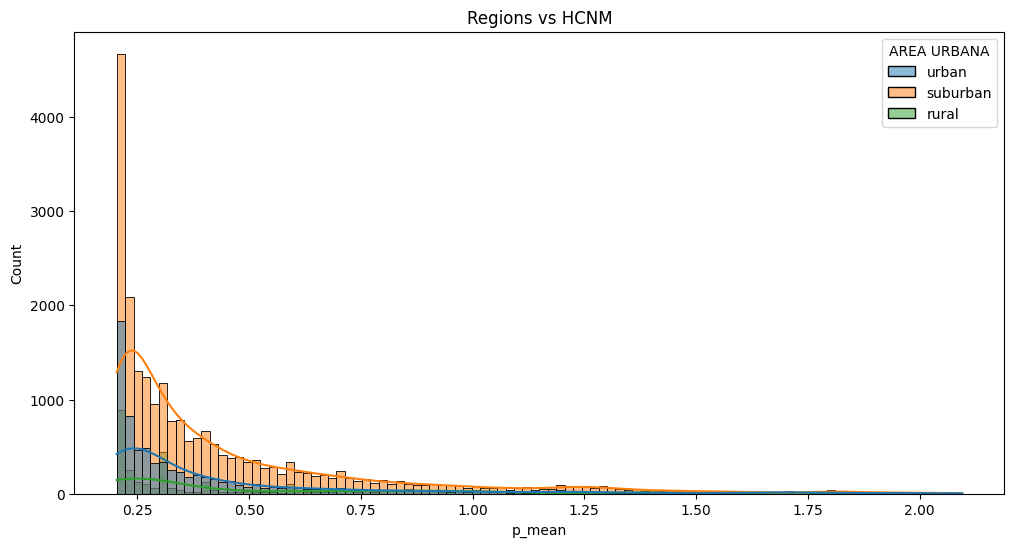

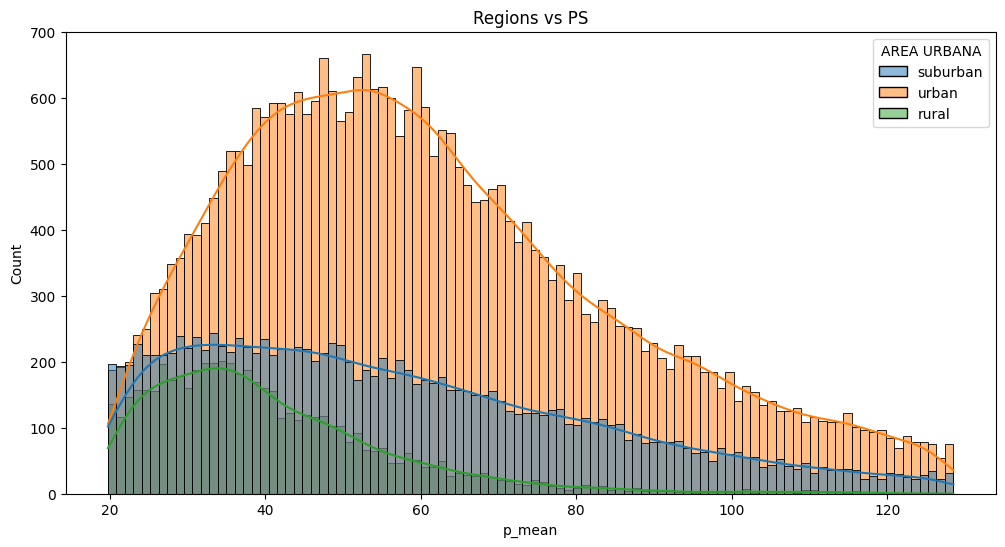

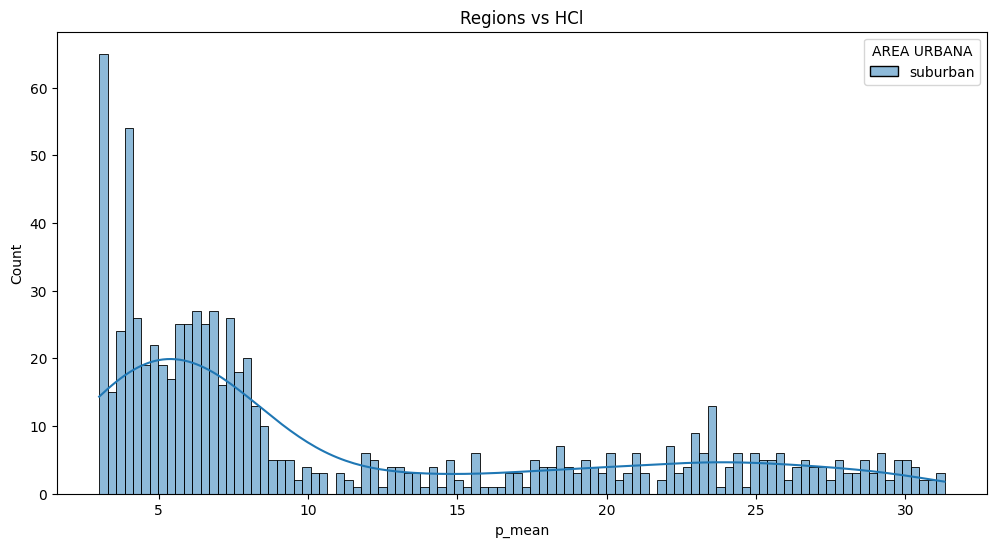

In [181]:
low = .05
high = .95
# quant_df = filt_df
for c in unique_contaminants:
    print(f"Showing for {c}")
    fig, ax = plt.subplots(figsize=(12, 6))
    
    cur_df = df[df[CONTAMINANT] == c]
    lower_upper_df = cur_df.quantile([low, high])[p_mean]
#     print(cur_df[p_mean] > lower_upper_df[low])
    cur_df = cur_df[(cur_df[p_mean] > lower_upper_df[low]) & (cur_df[p_mean] < lower_upper_df[high])]
#     print(lower_upper_df[0.1])
#     for r in unique_regions:
# #         print(cur_df.columns)
# #         print(cur_df[cur_df[region_type] == r].head())
    sns.histplot(data=cur_df, x=p_mean, bins=100, ax=ax, kde=True, hue=region_type)
    title = f"Regions vs {c}"
#     ax.set_ylabel(f'Pollution conc. {c_units[c]}')
    plt.title(title)
#     plt.show()
    save_dir = f"pollutantPlots/regional_hist_trimmed"
    os.makedirs(save_dir, exist_ok=True)
    plt.savefig(f'{save_dir}/{c}.png')  # Repo will contain all the plots labelled

For most of the data that has measurements from 3 regions, most of the time the mean of the concentraation mean is concentraated at higher values in urban, suburban and rural area lowest in descending order

### Rank the cities in the dataset according to their level of pollution, and create best-5 and worst-5 lists. (10 points)

In [194]:
city_rank = {}

for city in unique_cities:
    city_rank[city] = 0

for c in unique_contaminants:
    print(f"Showing for {c}")
    cur_df = df[df[CONTAMINANT] == c].groupby(city_col).mean()
    cur_df.sort_values(by=p_mean, inplace = True) 
    print(f"Best 5 for {c}")
    print(cur_df.index[:5])
    print(f"Worst 5 for {c}")
    print(cur_df.index[-5:])
    c_idx = 0
    for idx, row in cur_df.iterrows():
#         print(row)
        city_rank[idx] += c_idx
        c_idx += 1
    


Showing for PM10
Best 5 for PM10
Index(['Montseny', 'Vallcebre', 'Sant Esteve de la Sarga',
       'Vandellòs i l'Hospitalet de l'', 'Gandesa'],
      dtype='object', name='MUNICIPI')
Worst 5 for PM10
Index(['Santa Perpètua de Mogoda', 'Barcelona', 'Sant Vicenç dels Horts',
       'Sant Andreu de la Barca', 'Gavà'],
      dtype='object', name='MUNICIPI')
Showing for NOX
Best 5 for NOX
Index(['Sant Esteve de la Sarga', 'Santa Pau', 'Montseny', 'Begur',
       'Vandellòs i l'Hospitalet de l''],
      dtype='object', name='MUNICIPI')
Worst 5 for NOX
Index(['Sant Andreu de la Barca', 'Santa Perpètua de Mogoda',
       'Montcada i Reixac', 'Sabadell', 'Mollet del Vallès'],
      dtype='object', name='MUNICIPI')
Showing for NO
Best 5 for NO
Index(['Sant Esteve de la Sarga', 'Montseny', 'Santa Pau', 'Begur',
       'Ametlla de Mar, l''],
      dtype='object', name='MUNICIPI')
Worst 5 for NO
Index(['Santa Perpètua de Mogoda', 'Montcada i Reixac',
       'Sant Fost de Campsentelles', 'Sabadell'

TypeError: 'dict_items' object is not subscriptable

In [196]:
tmp = [(k, v) for k, v in sorted(city_rank.items(), key=lambda item: item[1])]
print("Best 5 overall")
for e in tmp[:5]:
    print(f"{e[0]} at rank {e[1]/len(unique_cities)}") 
print()
print("Worst 5 overall")
for e in tmp[-5:]:
    print(f"{e[0]} at rank {e[1]/len(unique_cities)}") 

Best 5 overall
Flix at rank 0.0
Nou de Berguedà, la at rank 0.2236842105263158
Alcanar at rank 0.2894736842105263
Santa Maria de Palautordera at rank 0.3026315789473684
Ponts at rank 0.3815789473684211

Worst 5 overall
Hospitalet de Llobregat, l' at rank 3.9473684210526314
Granollers at rank 4.052631578947368
Mollet del Vallès at rank 4.131578947368421
Barcelona at rank 4.2631578947368425
Sabadell at rank 4.2894736842105265


## Build and publish an algorithm to predict the average concentration of one pollutant of your choice per month for the next 24 months - on average for all stations. (20 points)

Showing for PM10
m
1.0     19.055556
2.0     25.427469
3.0     27.288501
4.0     14.597484
5.0     16.315134
6.0     16.510802
7.0     16.257222
8.0     17.325490
9.0     16.728448
10.0    17.435835
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Tarragona (Bonavista), year 2012
m
1.0     10.337366
2.0     16.218344
3.0     13.602199
4.0     15.972701
5.0     13.298036
6.0     15.099275
7.0     20.809666
8.0     15.499377
9.0     15.521795
10.0    18.535450
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Tarragona (Bonavista), year 2013
m
1.0     11.720531
2.0     14.846591
3.0     19.137360
4.0     12.027489
5.0     10.687471
6.0     14.505578
7.0     15.861518
8.0     15.927542
9.0     17.642407
10.0    24.354839
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Tarragona (Bonavista), year 2014
m
1.0     17.278909
2.0     19.197464
3.0     20.117260
4.0     23.130997
5.0     22.696739
6.0     20.547039
7.0     2

m
1.0     12.333333
2.0     12.708333
3.0     16.385417
4.0     11.770833
5.0     12.645833
6.0     14.062500
7.0     14.614583
8.0     15.614583
9.0     14.633729
10.0    19.312697
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Igualada, year 2021
m
1.0     29.527256
2.0     18.970238
3.0     20.845464
4.0     19.681824
5.0     27.543011
6.0     20.734601
7.0     20.905425
8.0     17.444892
9.0     20.336111
10.0    26.509233
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Igualada, year 2022
m
1.0      6.089286
2.0     30.666667
3.0     21.458333
4.0     17.125000
5.0     16.666667
6.0     11.416667
7.0     13.708333
8.0     12.083333
9.0      6.125000
10.0     3.833333
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Igualada, year 2023
Series([], Name: p_mean, dtype: float64)
Month on month pollution levels for PM10 in Granollers, year 2015
m
1.0     33.606061
2.0     33.619333
3.0     25.384149
4.0     24.3

m
1.0     22.144727
2.0     21.265125
3.0     15.178145
4.0     13.501444
5.0     16.605482
6.0     17.703175
7.0     20.222113
8.0     18.378543
9.0     19.242478
10.0    21.079315
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Rubí, year 2020
m
1.0     15.720352
2.0     23.263962
3.0     20.904506
4.0     18.400509
5.0     20.163610
6.0     26.319432
7.0     21.638098
8.0     22.775282
9.0     19.855556
10.0    22.062683
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Rubí, year 2021
m
1.0     21.548861
2.0     18.102836
3.0     19.224444
4.0     16.894167
5.0     20.558285
6.0     22.104563
7.0     19.702270
8.0     18.175831
9.0     15.710242
10.0    23.876235
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Rubí, year 2022
m
1.0     14.631764
2.0     37.083333
3.0     24.541667
4.0     13.708333
5.0     14.625000
6.0     13.791667
7.0     11.875000
8.0     10.333333
9.0      6.375000
10.0    16.666667
Name:

m
1.0     20.640568
2.0     25.067045
3.0     29.207970
4.0     23.732112
5.0     26.198938
6.0     31.447224
7.0     28.832967
8.0     25.914101
9.0     30.466279
10.0    38.783858
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Barcelona (Eixample), year 2014
m
1.0     23.539458
2.0     27.649629
3.0     27.297510
4.0     31.493586
5.0     30.423195
6.0     30.137195
7.0     35.002139
8.0     24.866262
9.0     26.100884
10.0    27.941339
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Barcelona (Eixample), year 2015
m
1.0     26.406032
2.0     26.564153
3.0     24.076935
4.0     24.810495
5.0     25.242205
6.0     28.566646
7.0     26.686722
8.0     27.422761
9.0     24.140414
10.0    30.271505
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Barcelona (Eixample), year 2016
m
1.0     21.923490
2.0     30.311522
3.0     28.969976
4.0     25.151183
5.0     26.137402
6.0     33.156103
7.0     27.782592
8.0     26.

Month on month pollution levels for PM10 in Sant Adrià de Besòs, year 2011
m
1.0     29.528318
2.0     33.977996
3.0     34.596460
4.0     27.911889
5.0     32.497017
6.0     34.507414
7.0     32.715495
8.0     37.178034
9.0     32.355507
10.0    29.809972
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Sant Adrià de Besòs, year 2012
m
1.0     20.476845
2.0     25.019066
3.0     22.213620
4.0     26.682143
5.0     22.682796
6.0     29.033359
7.0     29.501641
8.0     23.946744
9.0     24.758076
10.0    30.234454
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Sant Adrià de Besòs, year 2013
m
1.0     21.327171
2.0     24.978715
3.0     26.968612
4.0     21.631279
5.0     21.724029
6.0     24.258454
7.0     24.212610
8.0     24.183248
9.0     26.705887
10.0    35.180116
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Sant Adrià de Besòs, year 2014
m
1.0     26.726384
2.0     28.323346
3.0     25.911604
4.0     28.

Month on month pollution levels for PM10 in Barcelona (Sants), year 2002
m
1.0     36.258847
2.0     33.236904
3.0     40.670173
4.0     46.354167
5.0     43.524369
6.0     63.482383
7.0     61.185484
8.0     47.830061
9.0     38.519201
10.0    32.001110
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Barcelona (Sants), year 2003
m
1.0     27.153986
2.0     38.950179
3.0     35.825785
4.0     31.471818
5.0     48.779592
6.0     66.111458
7.0     59.230565
8.0     31.153061
9.0     36.435730
10.0    44.581291
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Barcelona (Sants), year 2004
m
1.0     55.074074
2.0     49.512500
3.0     47.100945
4.0     52.940832
5.0     43.741667
6.0     55.847717
7.0     60.757214
8.0     42.529766
9.0     43.722503
10.0    48.089793
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Barcelona (Sants), year 2005
m
1.0     45.107126
2.0     50.116667
3.0     48.046239
4.0     48.086207
5

m
1.0     20.493817
2.0     19.315821
3.0     21.879830
4.0     17.258805
5.0     21.199413
6.0     23.070238
7.0     20.950915
8.0     17.646596
9.0     16.283009
10.0    25.863482
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Terrassa, year 2022
m
1.0     13.497024
2.0     42.000000
3.0     21.541667
4.0     13.166667
5.0     16.000000
6.0     14.583333
7.0     10.125000
8.0      9.208333
9.0      8.500000
10.0    14.625000
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Terrassa, year 2023
m
1.0     19.724457
2.0     21.462500
3.0     26.310596
4.0     20.758793
5.0     30.037740
6.0     25.327643
7.0     26.276231
8.0     24.492470
9.0     22.476379
10.0    23.255634
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Mataró, year 2009
m
1.0     18.823314
2.0     17.368893
3.0     23.678737
4.0     20.257646
5.0     20.394977
6.0     20.689421
7.0     23.583681
8.0     19.579293
9.0     18.557715
10.0    22.36

m
1.0     60.363005
2.0     59.226488
3.0     57.630259
4.0     53.158816
5.0     56.948925
6.0     68.683889
7.0     62.145314
8.0     49.989943
9.0     60.462662
10.0    60.085696
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Sant Vicenç dels Horts (Ribot), year 2006
m
1.0     56.742460
2.0     46.242754
3.0     46.034030
4.0     59.000000
5.0     52.213542
6.0     55.859375
7.0     51.708333
8.0     55.486111
9.0     58.178442
10.0    62.526369
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Sant Vicenç dels Horts (Ribot), year 2007
m
1.0     30.170471
2.0     37.736905
3.0     24.598926
4.0     33.809260
5.0     41.383146
6.0     41.666667
7.0     39.111194
8.0     36.116754
9.0     36.251488
10.0    47.172507
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Sant Vicenç dels Horts (Ribot), year 2008
m
1.0     29.586590
2.0     38.421429
3.0     37.042422
4.0     26.976377
5.0     28.391667
6.0     30.267780

m
1.0     19.451613
2.0     21.579154
3.0     16.089905
4.0     13.468434
5.0     15.991967
6.0     18.689150
7.0     23.824829
8.0     22.221014
9.0     19.966460
10.0    25.081627
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Manresa, year 2020
m
1.0     16.017882
2.0     25.869297
3.0     23.507038
4.0     17.561959
5.0     24.016009
6.0     26.352232
7.0     25.794809
8.0     26.653728
9.0     20.591061
10.0    30.447572
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Manresa, year 2021
m
1.0     30.025269
2.0     28.007455
3.0     29.758789
4.0     27.498413
5.0     38.599406
6.0     43.724470
7.0     33.446006
8.0     26.520772
9.0     24.103822
10.0    39.638754
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Manresa, year 2022
m
1.0     14.629011
2.0     44.608696
3.0     30.416667
4.0     21.666667
5.0     17.833333
6.0     13.833333
7.0     11.541667
8.0     24.833333
9.0      9.611111
10.0    15.583

m
1.0     21.719564
2.0     19.698551
3.0     20.032155
4.0     17.060744
5.0     20.257541
6.0     18.641438
7.0     20.059908
8.0     14.197222
9.0     19.320088
10.0    15.755421
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Cubelles (Poliesportiu), year 2015
m
1.0     13.731778
2.0     17.721996
3.0     15.110795
4.0     15.468818
5.0     16.890814
6.0     15.529084
7.0     16.994495
8.0     17.983440
9.0     14.746733
10.0    17.726246
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Cubelles (Poliesportiu), year 2016
m
1.0     13.277485
2.0     18.852814
3.0     17.261448
4.0     18.510578
5.0     15.348321
6.0     19.566786
7.0     21.269097
8.0     18.233152
9.0     15.970488
10.0    17.192890
Name: p_mean, dtype: float64
Month on month pollution levels for PM10 in Cubelles (Poliesportiu), year 2017
m
1.0     15.935043
2.0     16.307434
3.0     16.211705
4.0     22.708226
5.0     18.129630
6.0     16.793639
7.0     20.549545
8.

KeyError: 'y'

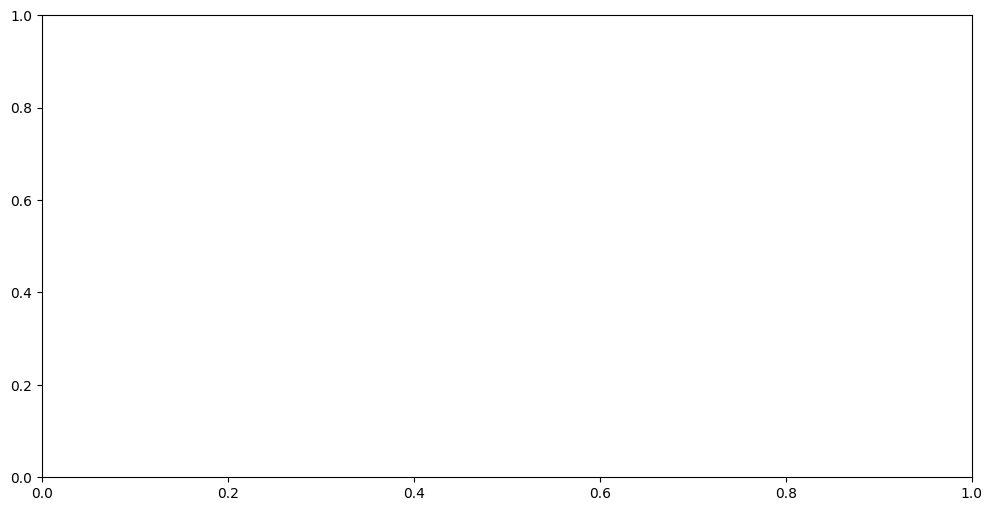

In [218]:
# The following would be just EDA first
for c in unique_contaminants:
    print(f"Showing for {c}")
    for station in unique_stations:
        cur_df = df[(df[CONTAMINANT] == c) & (df[station_col] == station)].groupby(date_col).mean()#[filter_cols]
        cur_df.sort_values(by=date_col, inplace = True) 
        unique_years = cur_df[year].unique()
        for y in unique_years:
            year_df = cur_df[cur_df[year] == y].groupby(month).mean()
            print(year_df[p_mean][:10])
            fig, ax = plt.subplots(figsize=(12, 6))
            sns.lineplot(data=year_df, x=month, y=p_mean, label = 'mean', ax=ax)
            title = f"Month on month pollution levels for {c} in {station}, year {int(y)}"
            print(title)
            plt.title(title)
            ax.set_ylabel(f'Pollution amount {c_units[c]}')
#             plt.show()
            save_dir = f"pollutantPlots/stations/{station}/monthly/{c}"
            os.makedirs(save_dir, exist_ok=True)
            plt.savefig(f'{save_dir}/{c}_{int(y)}.png')  # Repo will contain all the plots labelled
#             plt.pause(0.01)
            plt.close()
    